# Выявление закономерностей, которые определяют успешность компютерной игры

## Введение

Цель настоящей работы выявить определяющие успешность игры закономерности. На основе исходных данных до 2016 года необходимо спрогнозировать кампанию на 2017 год. Выявление таких закономерностей позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Исходные данные представляют собой исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

## Описание данных

Информация о столбцах:

- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — возрастной рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**Данные за 2016 год могут быть неполными.**

## План проекта

1) Откроем файл с данными и изучим общую информацию

2) Подготовим данные, разберемся с пропусками, типами данных, дубликатами.

3) Посчитаем суммарные продажи во всех регионах.

4) Проведем исследовательский анализ данных:

- Посмотрим, сколько игр выпускалось в разные годы. 
- Посмотрите, как менялись продажи по платформам. Определим актуальный период данных.
- Возьмем данные за соответствующий актуальный период. 
- Выясним, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- Посмотрим на общее распределение игр по жанрам. 
- Составим портрет пользователя каждого региона.
- Выберем самые популярные платформы (топ-5) по регионам.
- Выберем самые популярные жанры (топ-5) по регионам.
- Выясним влияние рейтинга ESRB на продажи в отдельных регионах.

5) Проверим гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.


## Чтение данных и изучение общей информации

Установка библиотек:

In [1]:
!pip install seaborn -U
!pip install missingno -U

Сначала импортируем необходимые для работы библиотеки.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import missingno as msno
from IPython.display import display

Запишем датасет в датафрейм `df`:

In [3]:
df = pd.read_csv(r'C:\Users\IVMitrofanov\Downloads\games.csv')

Посмотрим общую информацию о датафрейме и ознакомимся со значениями в столбцах таблиц с помощью функции:

In [4]:
def dataframe_info(df):
    columns = df.columns
    print('Первые пять строк:')
    display(df.head())
    print('Основная информация о датафрейме:')
    df.info()
    print('Доля пропусков в датафрейме:')
    display(df.isna().mean())
    print('Число явных дубликатов: ', df.duplicated().sum())
    print('Основные статистические характеристики датафрейма:')
    display(df.describe().T)
    print('Уникальные значения в столбцах:')
    for column in columns:
        display(df[column].value_counts())

In [5]:
dataframe_info(df)

Первые пять строк:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Доля пропусков в датафрейме:


Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Число явных дубликатов:  0
Основные статистические характеристики датафрейма:


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Уникальные значения в столбцах:


Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

0.00     4508
0.02      576
0.03      561
0.04      549
0.01      545
         ... 
3.68        1
2.98        1
2.61        1
3.04        1
41.36       1
Name: NA_sales, Length: 402, dtype: int64

0.00     5870
0.01     1494
0.02     1308
0.03      926
0.04      709
         ... 
1.87        1
1.75        1
1.44        1
1.60        1
28.96       1
Name: EU_sales, Length: 307, dtype: int64

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: JP_sales, Length: 244, dtype: int64

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: Other_sales, Length: 155, dtype: int64

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: Critic_Score, Length: 82, dtype: int64

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Название игры **Need for Speed: Most Wanted** в столбце `Name` повторяется 12 раз, возможно в нем имеются дубликаты.  Посмотрим строки датафрейма соотвествущие этому названию игры:

In [6]:
df.query('Name == "Need for Speed: Most Wanted"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Получается, что это не дубликаты, а игры для разных платформ. К тому же игра 2012 года является переизданием игры 2005 года.

### Вывод: Чтение данных и изучение общей информации

Изучена общая информация о датафрейме. Явных и неявных дубликатов не выявлено.

В датафрейме обнаружены следующие проблемы:

1) Названия столбцов нужно привести к унифицированному виду - все названия привести к нижнему регистру. 

2) Имеются явные пропуски в столбцах `name`, `genre`, `year_of_release`, `critic_score`, `user_score` и `rating`.

3) В столбцах типа `_sales` много значений, где продажи равны нулю. Возможно это относится к неявным пропускам в данных, нужно убедиться в этом в следующем разделе работы.

4) В столбце `user_score` чаще всего встречается значение **tbd** (2424 раза). Эта аббревиатура расшифровывается как To Be Determined, то есть "Будет определено". Стоит отметить также, что у этой аббревиатуры могут быть и иные значения, например To Be Done - должно быть сделано, или To Be Discussed - подлежит обсуждению. Таким образом, значение **tbd** является неявным пропуском в данных.

5) Столбец `year_of_release` нужно привести к целочисленному типу, после обработки в нем пропусков.


## Предобработка данных

Данный раздел работы посвящен предобработке данных - устранению выявленных проблем в предидущем разделе. Для начала приведем название столбцов в унифицированный вид (приведем к нижнему регистру):

In [7]:
df.columns = df.columns.str.lower()

Проверим результат изменения названия столбцов:

In [8]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка явных пропусков

В датафрейме имеются явные пропуски данных, вычислим их долю в каждом столбце:

In [9]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Наблюдается:

- крайне малое количество пропусков в столбцах `name`, `genre` и `year_of_release` (по 0.012 и 1.6 % соотвественно);
- высокое количество пропусков в столбцах `critic_score`, `user_score` и `rating` (51.3, 40.1 и 40.0 % соотвественно).

Визуализируем пропуски, построим матрицу пропущенных значений с помощью библиотеки `missingno`:

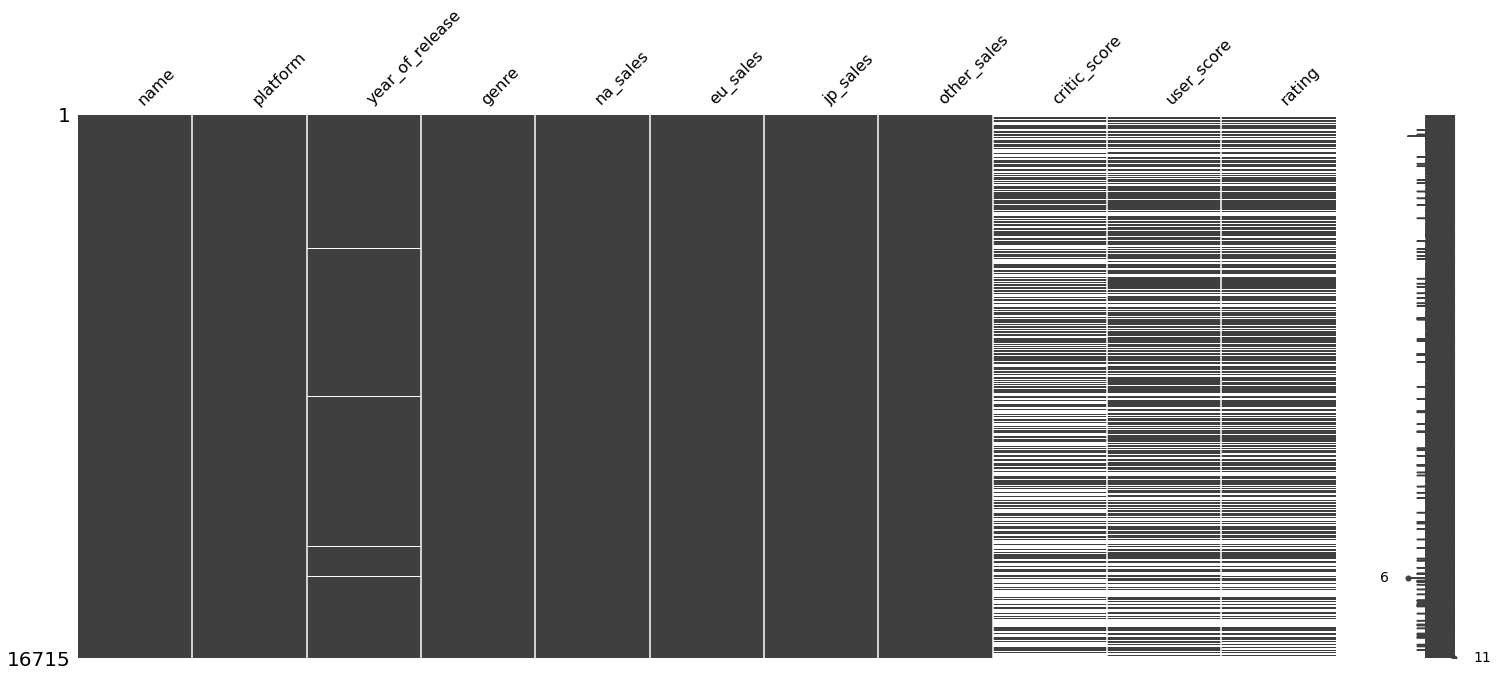

In [10]:
msno.matrix(df);

- Пропуски в столбцах `name` и `genre` настолько малы, что их даже не видно на матрице, пропуски в столбце `year_of_release` похоже, несут в себе случайный характер.
- Пропуски в столбцах `critic_score`, `user_score` и `rating` имеют похожий шаблон пропущенных значений. Их распределение в датафрейме носит систематический характер. Возможно, информация в датасет просто не была добавлена. Можно предположить, что  пропущена информация по некоторым играм, а это уже не случайные пропуски, а неполная информация. 

Посмотрим строки в датафрейме с пропусками в столбцах `name` и `genre`:

In [11]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две строки, возможно они относятся к одной и той же игре если судить по году релиза и по продажам. Эти строки можно отбросить так как игра достаточно старая и для нашего анализа она не пригодиться. 

Пропуск в данных скорее всего связан с тем, что игра достаточно старая и не популярная - возможно, что данные по ней не сохранились.

Избавимся от пропусков в столбцах `name` и `genre`:

In [12]:
df.dropna(subset = ['name'], inplace = True)

Проверим долю пропусков в датафрейме:

In [13]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.016095
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.404715
dtype: float64

Посмотрим первые пять строк в датафрейме с пропусками в столбце `year_of_release`:

In [14]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Трудно сказать, откуда взялись пропуски в столбце `year_of_release`. Из-за случайного их расположения в датафрейме, можно предположить что они связаны с человеческим фактором (не внесенные данные в датасет). 

Так как доля таких пропусков составляет 1.6 % всего датасета, избавимся от них:

In [15]:
df.dropna(subset = ['year_of_release'], inplace = True)

Проверим долю пропусков в датафрейме:

In [16]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64

Избавившись от пропусков в столбце `year_of_release`, приведем его к целочисленному типу (*int*):

In [17]:
df['year_of_release'] = df['year_of_release'].astype(int)

Проверим результат:

In [18]:
df.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Перейдем к стобцам имеющие высокую долю пропусков в данных.

Посмотрим как распределены пропуски в столбцах `critic_score`, `user_score` и `rating` по дате релиза игр, где высотой диаграммы будет не число пропусков, а их доля (параметр гистограммы `stat='probability'`). Иными словами, построим плотность распределения пропусков по дате релиза:

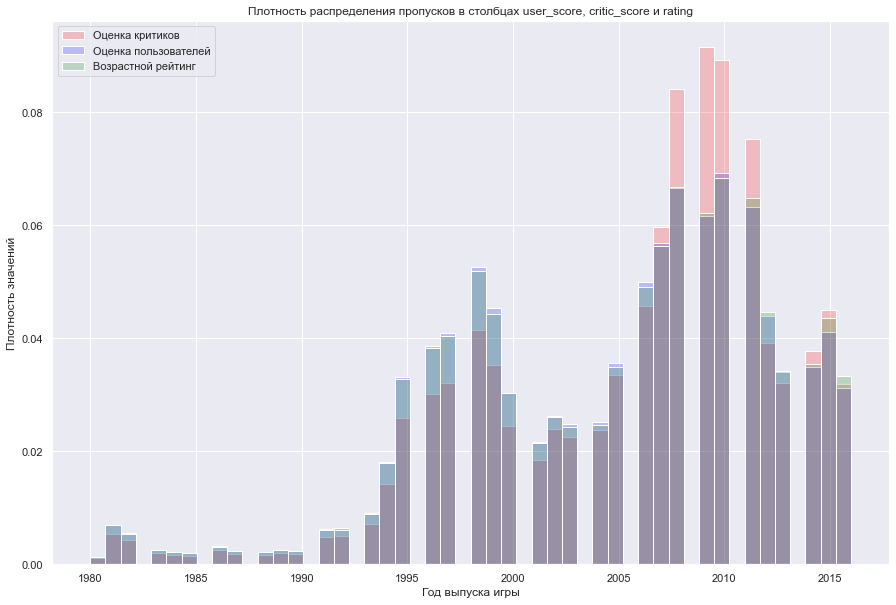

In [19]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))

ax = sns.histplot(df[df['critic_score'].isna()]['year_of_release'],
             bins=50,
             stat='probability',
             label='Оценка критиков',
             color='red',
             alpha=0.2)
ax = sns.histplot(df[df['user_score'].isna()]['year_of_release'],            
             bins=50,
             stat='probability',
             label='Оценка пользователей',
             color='blue',
             alpha=0.2)
sns.histplot(df[df['rating'].isna()]['year_of_release'],
             bins=50,
             stat='probability',
             label='Возрастной рейтинг',
             color='green',
             alpha=0.2,
             ax=ax).set_title('Плотность распределения пропусков в столбцах user_score, critic_score и rating')
plt.xlabel("Год выпуска игры")
plt.ylabel("Плотность значений")
plt.legend()
plt.show()

Вид всех плотностей распределений схож, а плотность распределений пропусков столбцов `user_score` и `rating` практически сливаются. Это подтверждает то, что скорее всего информация по этим столбцам отсутствует или не была внесена.

Посмотрим на плотность распределения значений в столбцах `critic_score` и `user_score` (для столбца `user_score` при построении исключим значения **tbd** из столбца и преобразуем тип данных из *obect* в *float*):

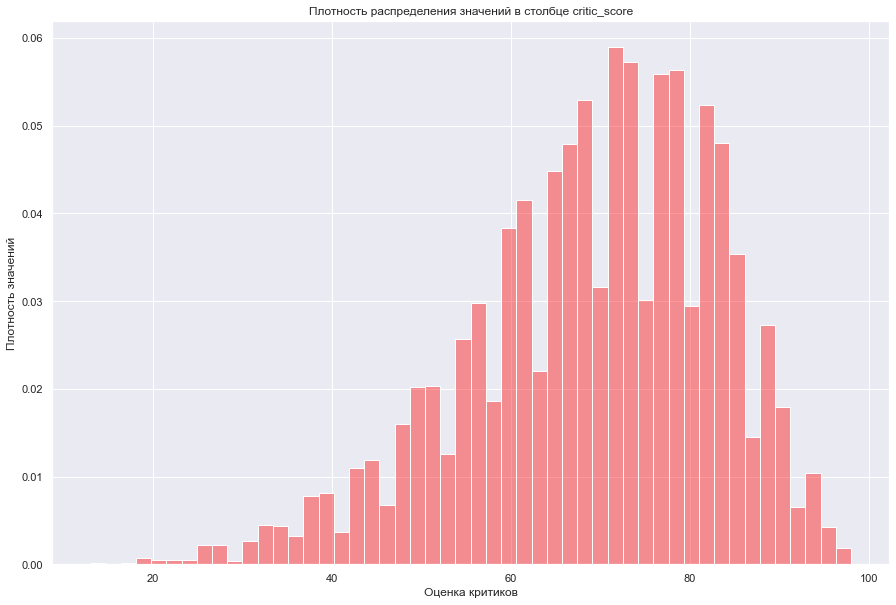

In [20]:
plt.figure(figsize=(15, 10))

sns.histplot(df['critic_score'],
             bins=50,
             stat='probability',
             label='critic_score',
             color='red',
             alpha=0.4).set_title('Плотность распределения значений в столбце critic_score')
plt.xlabel("Оценка критиков")
plt.ylabel("Плотность значений");

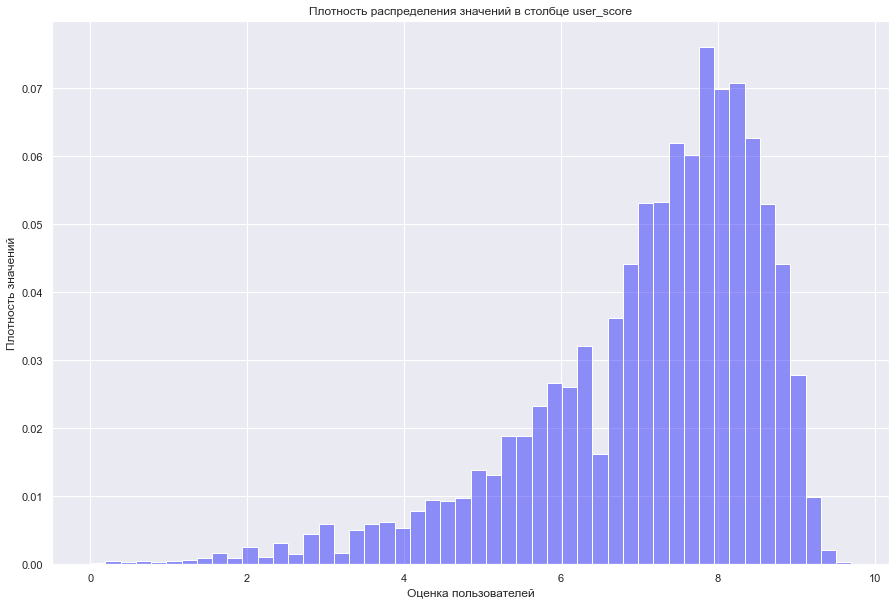

In [21]:
plt.figure(figsize=(15, 10))

sns.histplot(df.query('user_score != "tbd"')['user_score'].astype(float),            
             bins=50,
             stat='probability',
             label='user_score',
             color='blue',
             alpha=0.4).set_title('Плотность распределения значений в столбце user_score')
plt.xlabel("Оценка пользователей")
plt.ylabel("Плотность значений");

Любая замена пропусков в количественных переменных (столбцы `critic_score` и `user_score`) приведет к искажению данных.  Чтобы этого не произошло, пропуски в этих столбцах будем игнорировать.

Пропуски в столбец `rating` можно заполнить значением-заглушкой.

Пропуски в столбце `rating` заполним значением-загулшкой, например "unknown". Пропуски в этом столбце являются ценной инорфмацией и индикатор "unknown" поможет сделать некоторые выводы в дальнейшем анализе.

Больше всего пропусков в столбце `critic_score` с оценкой критиков. Может игры не были оценены из-за их низкой популярности и малых продаж? Выведем первые 5 строк датафрейма с пропусками в столбце `critic_score`:

In [22]:
df[df['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Встречаются игры с большим числом продаж, но без рейтинга. Поэтому предположение выше не может быть причиной пропусков в данных.

Посмотрим, как изменилась матрица пропусков для столбцов `critic_score`, `user_score` и `rating`:

<AxesSubplot:>

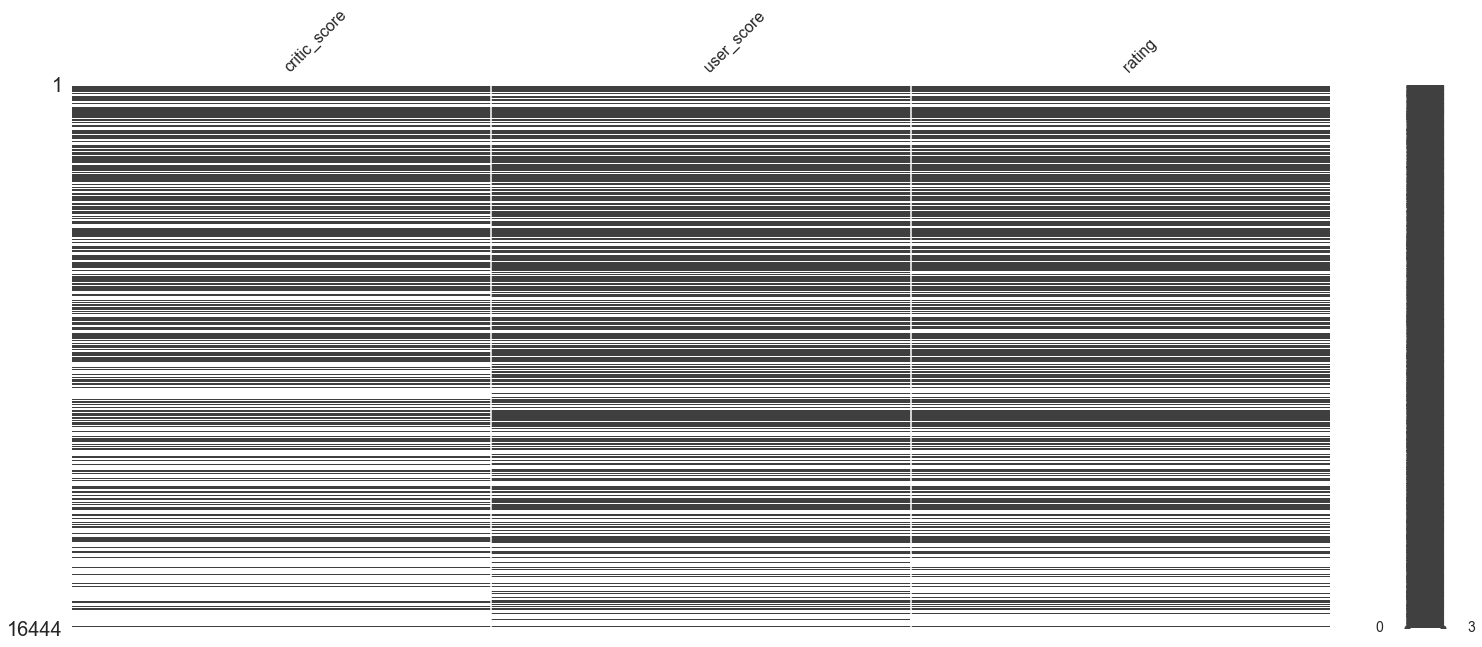

In [23]:
msno.matrix(df[['critic_score', 'user_score', 'rating']])

Шаблон пропущенных значений сохраняется.

In [24]:
df['rating'] = df['rating'].fillna('unknown')

Убедимся в заполнении пропусков:

In [25]:
df['rating'].isna().mean()

0.0

### Обработка неявных пропусков

В столбце `user_score` встречались значения **tbd**, которые несут в себе смысл, что рейтинг еще не был вычислен. Такие значение сначала стоит удалить (так как из-за их наличия тип данных в столбце - *object*):

In [26]:
df.loc[df['user_score'] == "tbd", 'user_score'] = None

И изменить тип данных в нем на *float*:

In [27]:
df['user_score'] = df['user_score'].astype(float)

Убедимся в изменении типов данных:

In [28]:
df.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Также ранее были замечены неявные пропуски в столбцах типа `_sales`, где много значений нулевых продаж. Разберемся в их происхождении.

Выведем первые 5 строк датафрейма:

In [29]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


Посмотрим на распределение значений в столбцах типа `_sales`:

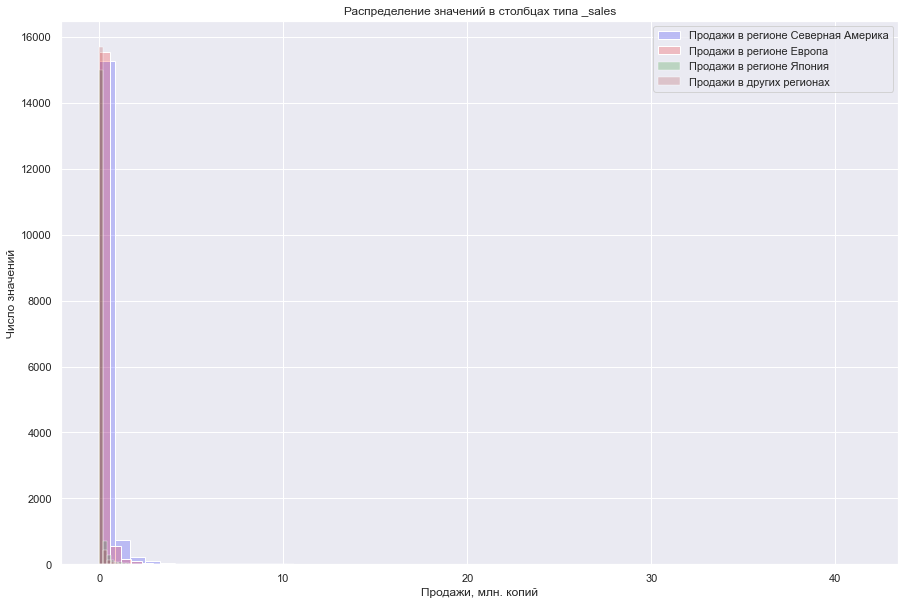

In [30]:
plt.figure(figsize=(15, 10))

sns.histplot(df['na_sales'],            
             bins=50,
             label='Продажи в регионе Северная Америка',
             color='blue',
             alpha=0.2)
sns.histplot(df['eu_sales'],            
             bins=50,
             label='Продажи в регионе Европа',
             color='red',
             alpha=0.2)
sns.histplot(df['jp_sales'],            
             bins=50,
             label='Продажи в регионе Япония',
             color='green',
             alpha=0.2)
sns.histplot(df['other_sales'],            
             bins=50,
             label='Продажи в других регионах',
             color='brown',
             alpha=0.2).set_title('Распределение значений в столбцах типа _sales')
plt.legend()
plt.xlabel("Продажи, млн. копий")
plt.ylabel("Число значений");
plt.show()

Либо большое количество нулевых продаж искажает распределение, из-за чего оно имеет жирный хвост, либо распределение на самом деле так выглядит. Проверим это, построив распределение тех значений, исключая нулевые продажи:

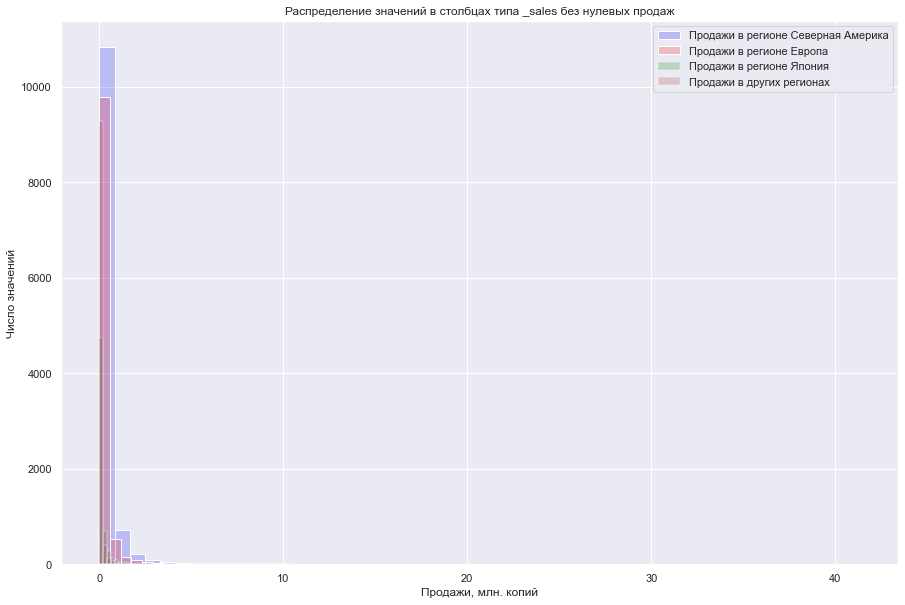

In [31]:
plt.figure(figsize=(15, 10))

sns.histplot(df.query('na_sales != 0')['na_sales'],            
             bins=50,
             label='Продажи в регионе Северная Америка',
             color='blue',
             alpha=0.2)
sns.histplot(df.query('eu_sales != 0')['eu_sales'],            
             bins=50,
             label='Продажи в регионе Европа',
             color='red',
             alpha=0.2)
sns.histplot(df.query('jp_sales != 0')['jp_sales'],            
             bins=50,
             label='Продажи в регионе Япония',
             color='green',
             alpha=0.2)
sns.histplot(df.query('other_sales != 0')['other_sales'],            
             bins=50,
             label='Продажи в других регионах',
             color='brown',
             alpha=0.2).set_title('Распределение значений в столбцах типа _sales без нулевых продаж')
plt.legend()
plt.xlabel("Продажи, млн. копий")
plt.ylabel("Число значений");
plt.show()

Выходит, что не нули искажают распределение, а оно на самом деле является таковым.

Возможной причиной нулевых продаж может являться низкая популярность конкретных игр и соответственно низкие ее продажи. Значения в столбцах имеют порядок миллиона копий, вполне может быть, что в данных много непопулярных игр, которые имели продажи порядка десяти тысяч копий и были записаны как нули. В таком случае нули - это ценная информация, их заполнение приводит к искажению. Если игры не продавались, то мы хотим это увидеть в анализе данных.

Вычислим долю нулевых продаж в столбцах:

- столбец `na_sales`

In [32]:
df.query('na_sales == 0')['na_sales'].count() / df.shape[0]

0.2705546095840428

- столбец `eu_sales`

In [33]:
df.query('eu_sales == 0')['eu_sales'].count() / df.shape[0]

0.350644612016541

- столбец `jp_sales`

In [34]:
df.query('jp_sales == 0')['jp_sales'].count() / df.shape[0]

0.6263682802237899

- столбец `other_sales`

In [35]:
df.query('other_sales == 0')['other_sales'].count() / df.shape[0]

0.39479445390415957

Значительная доля нулей, особенно у столбца `jp_sales`. Выходит, что в регионе Япония люди меньше покупают неудачные игры.

Посмотрим основные статистические характеристики столбцов типа `_sales`:

- столбец `na_sales`

In [36]:
df['na_sales'].describe()

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

- столбец `eu_sales`

In [37]:
df['eu_sales'].describe()

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

- столбец `jp_sales`

In [38]:
df['jp_sales'].describe()

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

- столбец `other_sales`

In [39]:
df['other_sales'].describe()

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

По основным статистическим характеристикам столбца `_sales` можно сказать, что основная масса выпускаемых игр плохо продается.

Добавим столбец `sum_sales` в датафрейм с суммой продаж во всех регионах:

In [40]:
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

### Вывод: Предобработка данных

- Столбец `year_of_release` был приведен в целочисленному типу, после удаления в нем пропусков.

- В датафрейме очень много явных и неявных пропусков. Причиной появления последних, возможно является низкая популярность конкретных игр и соответственно низкие ее продажи. Значения в столбцах имеют порядок миллиона копий, вполне может быть, что в данных много непопулярных игр, которые имели продажи порядка десяти тысяч копий и были записаны как нули. Также имеет место системный сбой (при сборе или обработке данных), так как шаблон пропусков (при визуализации их с помощью матрицы пропусков) очень схож. Касаемо явных пропусков в данных, шаблон их распределения в датасете очень схож. Наличие их в датасете носит систематический характер, что может говорить о том что данные неполные. Возможно, информация в датасет просто не была добавлена.

Пройдемся по конкретным пропускам:

1) явные пропуски в столбцах `name`, `genre` и `year_of_release` были отброшены, так как их доля в датафрейме достаточно низка (по 0.012 и 1.6 % соответственно);

2) явные пропуски в столбцах `critic_score`, `user_score` были игнорированы, так как их доля довольно высока (51.3, 40.1 и 40.0 % соответственно) и заполнение медианными значениями влечет за собой неестественное искажение распределений значений в этих столбцах и, соответственно, неверным выводам.

3) явные пропуски в категориальном столбец `rating` были заполнены значениями-заглушками - "unknown". Пропуски в этом столбце являются ценной информацией и индикатор "unknown" поможет сделать некоторые выводы в дальнейшем анализе.

4) неявные пропуски в столбцах типа `_score` (значения продаж равные нулю) были игнорированы, так как это ценная информация, их заполнение приводит к искажению данных. Если игры не продавались, то мы хотим это увидеть в анализе данных.

- В датафрейм был добавлен столбец `sum_sales` с суммарными продажами по всех регионах


## Исследовательский анализ данных

Проведем иследовательский анализ данных. Сперва исследуем распределение числа игр по году их выхода.

### Распределение числа игр по году выхода

Выведем первые 5 строк датафрейма:

In [41]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Посмотрим, сколько игр выпускалось в разные годы. Построим гистограмму. Для выбора количества бинов, посмотрим за какой интервал имеются данные о релизах игр:

In [42]:
df['year_of_release'].max()

2016

In [43]:
df['year_of_release'].min()

1980

Интервал 36 лет, укажем значение 36 в параметре количества корзин, так каждому столбцу в гистограмме будет соответствовать один год:

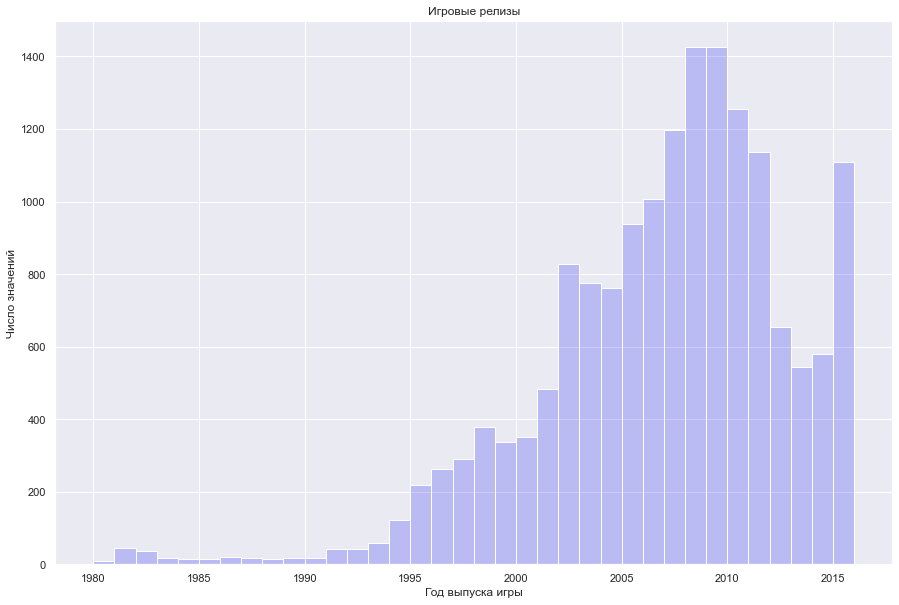

In [44]:
plt.figure(figsize=(15, 10))

sns.histplot(df['year_of_release'],            
             bins=36,
             color='blue',
             alpha=0.2).set_title('Игровые релизы');
plt.xlabel("Год выпуска игры")
plt.ylabel("Число значений");

Больше всего игр было выпущено в 2008 и 2009 году, после чего наблюдается спад (число выпускаемых игр в год падает практическим в 2 раза в 2012 году). В 2016 году число выпускаемых игр снова возвращается на уровень до падения в 2012 году. Резкие перепады числа выпускаемых игр возможно связаны с выходом тех или иных игровых платформ.

Далее посмотрим изменение продаж по видам игровых платформ.

### Изменение продаж по видам игровых платформ

Посмотрим, как менялись продажи по игровым платформам. Выберем топ-10 игровых платформ с наибольшими суммарными продажами:

In [45]:
top10_platform_pivot = df.pivot_table(
                                    index='platform', 
                                    values='sum_sales', 
                                    aggfunc='sum').sort_values(
                                                                by='sum_sales', 
                                                                ascending=False).head(10)
top10_platform_pivot

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Запишем названия игровых платформ, попавших в топ-10 в список `top_10_platform`.

In [46]:
top10_platform = top10_platform_pivot.index.to_list()
top10_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Построим распределение для каждой игровой платформы из нашего топ-10 по годам. Количеству бинов будет соответствовать временной интервал "актаульности" платформы. Также вместе с гистограммой выведем на экран срок "актуальности" каждой игровой платформы под ее гистограммой.

*Примечание. Под актуальностью игровой платформы понимается интервал между первой и последней выпущенной игрой на данную платформу.*

In [47]:
def plot_hist(df):
    for platform in top10_platform:   
        plt.figure(figsize=(15, 5))
        bins = df.query('platform == @platform')['year_of_release'].max() \
        - df.query('platform == @platform')['year_of_release'].min()
        sns.histplot(df.query('platform == @platform')['year_of_release'], 
             bins=bins,
             color='blue',
             alpha=0.2).set_title('Игровая платформа ' + platform)
        plt.xlabel("Год выпуска игры")
        plt.ylabel("Число значений");
        plt.show()
        if bins <= 4:
            print('Срок "актуальности" игровой платформы {} - {} года'.format(platform, bins))
        else:
            print('Срок "актуальности" игровой платформы {} - {} лет'.format(platform, bins))

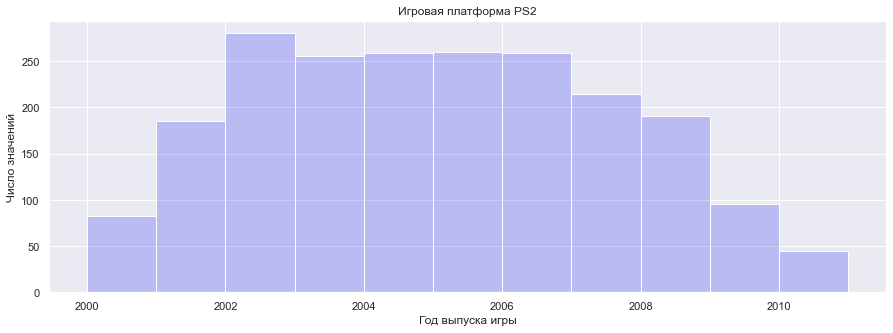

Срок "актуальности" игровой платформы PS2 - 11 лет


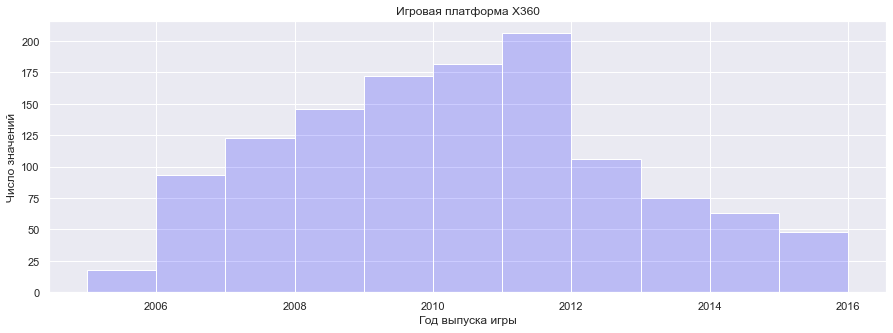

Срок "актуальности" игровой платформы X360 - 11 лет


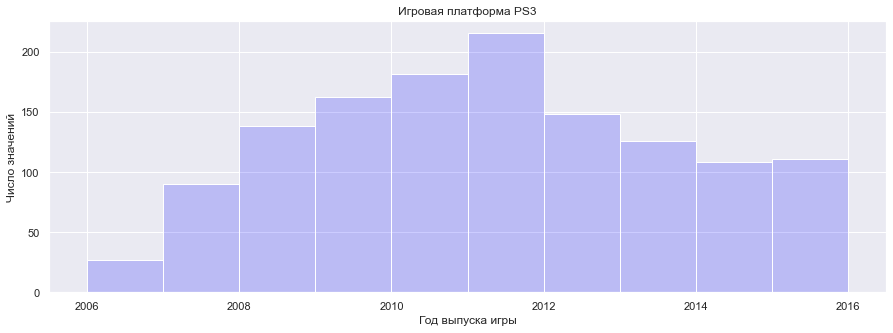

Срок "актуальности" игровой платформы PS3 - 10 лет


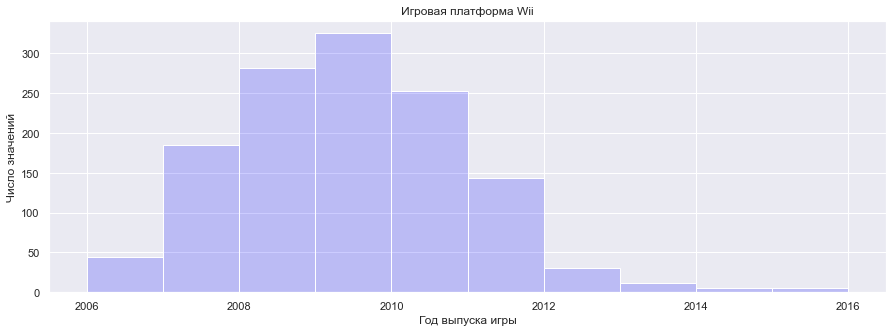

Срок "актуальности" игровой платформы Wii - 10 лет


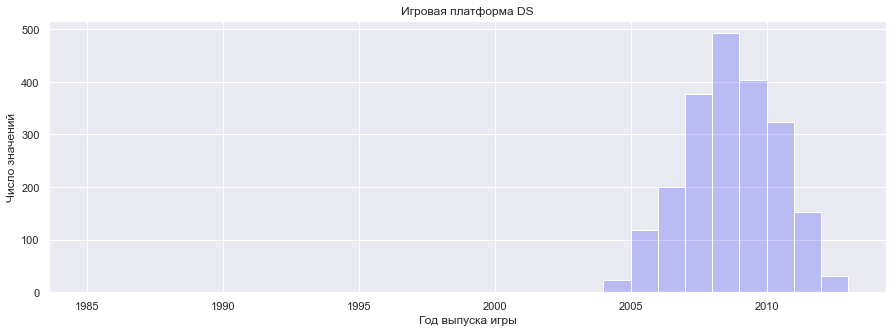

Срок "актуальности" игровой платформы DS - 28 лет


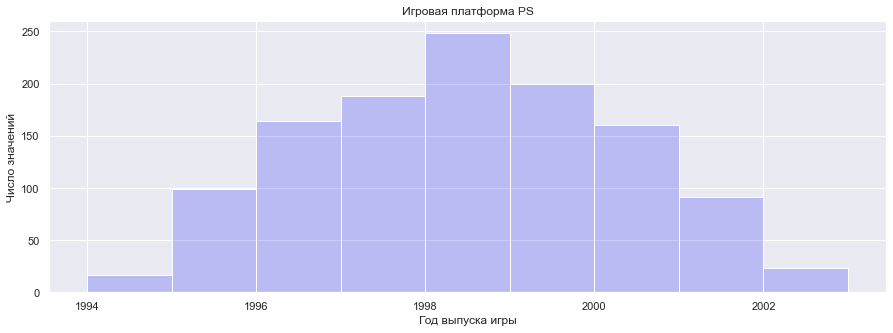

Срок "актуальности" игровой платформы PS - 9 лет


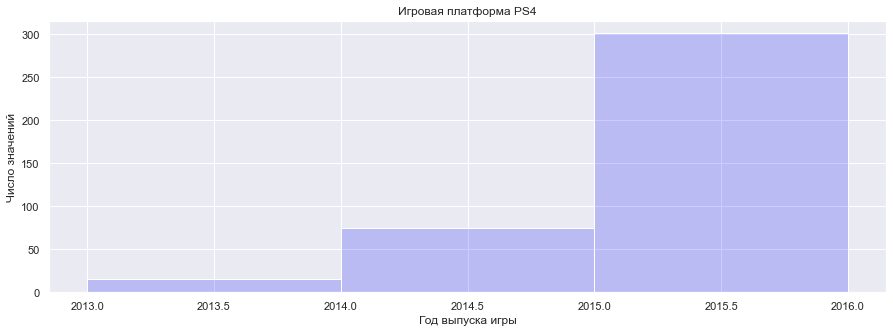

Срок "актуальности" игровой платформы PS4 - 3 года


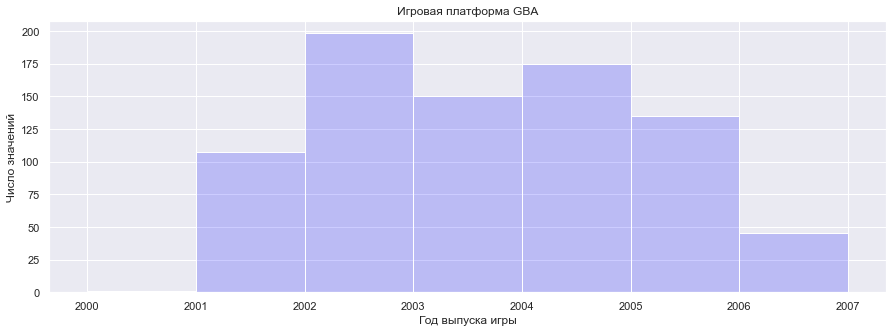

Срок "актуальности" игровой платформы GBA - 7 лет


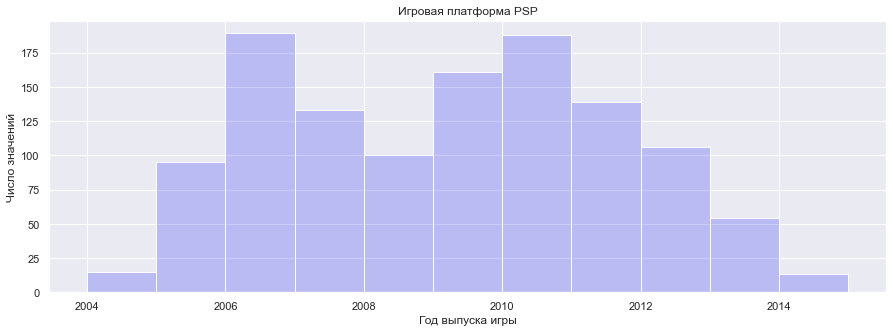

Срок "актуальности" игровой платформы PSP - 11 лет


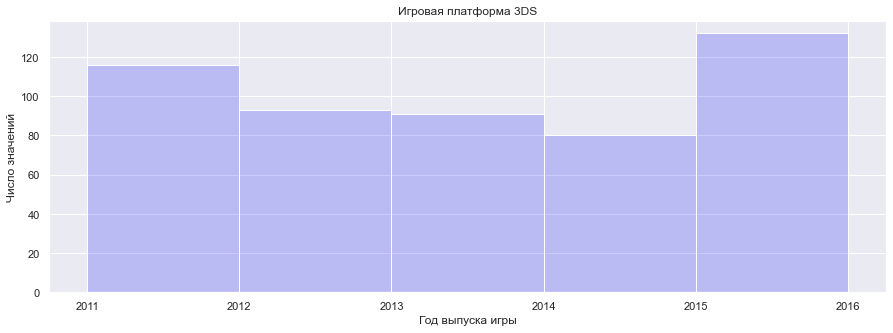

Срок "актуальности" игровой платформы 3DS - 5 лет


In [48]:
plot_hist(df)

Интересно, что срок "актуальности" игровой платформы составляет от 7 до 11 лет (в среднем 10 лет). Из этого ряда выбиваются некоторые платформы:
- 31 год для PC. PC ее можно назвать "нестареющей" игровой платформой, вопросов не возникает.
- 28 лет для DS. Платформа nintendo DS, из общего доступа известно, что платформа вышла в 2004 году, а ее поддержка прекращена в 2013. Явно какая-то ошибка. Также это подтверждает вид гистограммы, распределение имеет тяжелый хвост.
- 3 года для PS4. Ничего удивительного, платформа playstation 4 является самой "свежей" в нашем то-10, ее дата выхода - 2013 год.

Посмотрим, игры каких годов встречаются для платформы DS, чтобы разобраться с причиной столь высокого срока "актуальности" игровой платформы.

In [49]:
df.query('platform == "DS"')['year_of_release'].value_counts()

2008    492
2009    403
2007    376
2010    323
2006    201
2011    153
2005    118
2004     23
2012     23
2013      8
1985      1
Name: year_of_release, dtype: int64

1 игра в 1985, такого явно не может быть. Здесь точно ошибка. Удалим такую строку из датафрейма:

In [50]:
df = df.query('~(platform == "DS" and year_of_release == 1985)')

Посмотрим на изменения гистограммы для игровой платформы DS:

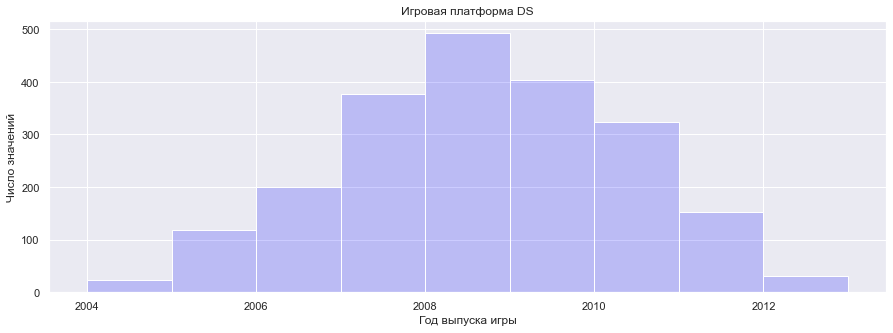

Срок "актуальности" игровой платформы DS - 9 лет


In [51]:
plt.figure(figsize=(15, 5))
bins = df.query('platform == "DS"')['year_of_release'].max() \
        - df.query('platform == "DS"')['year_of_release'].min()
sns.histplot(df.query('platform == "DS"')['year_of_release'], 
             bins=bins,
             color='blue',
             alpha=0.2).set_title('Игровая платформа '+'DS')
plt.xlabel("Год выпуска игры")
plt.ylabel("Число значений");
plt.show()
print('Срок "актуальности" игровой платформы DS - {} лет'.format(bins))

Тяжелый хвост распределения для игровой платформы исчез, а срок ее "актуальности" больше не вызвает вопросов.

Из проведенного анализа установим актуальный период данных для проведения дальнейшего анализа.

### Актуальный период данных

Теперь необходимо выбрать актуальный период данных для прогноза кампании на 2017 год. Исходя из построенных распределений, резкий спад платформы может произойти буквально за 3 года. Лидер по продажам за всю историю PS2. Но продажи к 2011 году уже нулевые. X360 был на пике в 2010, но к 2016 упал почти до 0. Мы видим, что с 2008 по 2012 наблюдалось резкое снижение продаж и релизов, поэтому некоторые платформы уже нежизнеспособны в 2013 и в 2017 соответственно.

Исходя из вышесказанного, возьмем актуальный период в 3 года (от 2014 до 2016 года).

Сохраним отфильрованный датасет в датафрейм `df_actual`.

In [52]:
df_actual = df.query('year_of_release >= 2014')

Выведем первые 5 строк датафрейма `df_acutal`:

In [53]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


Выберем топ-10 игровых платформ с наибольшими суммарными продажами за выбранный актуальный период:

In [54]:
top10_actual_platform_pivot = df_actual.pivot_table(
                                    index='platform', 
                                    values='sum_sales', 
                                    aggfunc='sum').sort_values(
                                                                by='sum_sales', 
                                                                ascending=False).head(10)
top10_actual_platform_pivot

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


По суммарным продажам за выбранный актуальный период лидируют PS4 и XOne.

Перезапишем список `top10_platform` с новым топ-10 игровых платформ за **актуальный период**:

In [55]:
top10_platform = top10_actual_platform_pivot.index.to_list()
top10_platform

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

Построим график изменения суммарных продаж от времени для каждой платформы, входящей в топ-10.

In [56]:
def plot_line(df):
    for platform in top10_platform:   
        plt.figure(figsize=(15, 5))
        sns.lineplot(
                    data=df.query('platform == @platform').pivot_table(
                        index='year_of_release', 
                        values='sum_sales', 
                        aggfunc='sum'),
                    y='sum_sales',
                    x='year_of_release',
                    color='blue',
                    ci=None,
                    marker='o').set_title('Игровая платформа ' + platform)
        plt.xticks([2014, 2015, 2016])
        plt.xlabel("Год выпуска игры")
        plt.ylabel("Суммарные продажи, млн. копий");
        plt.show()
                    

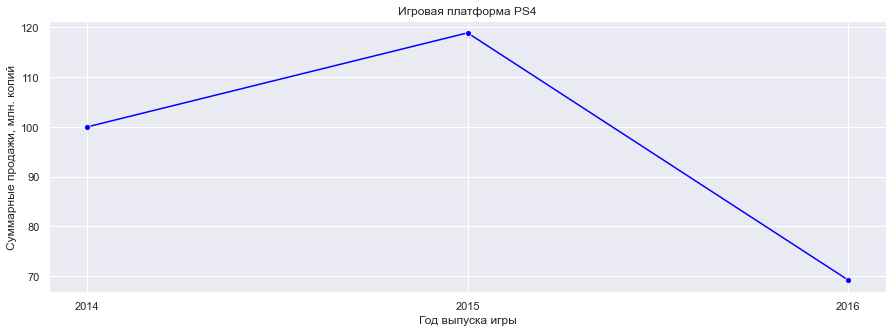

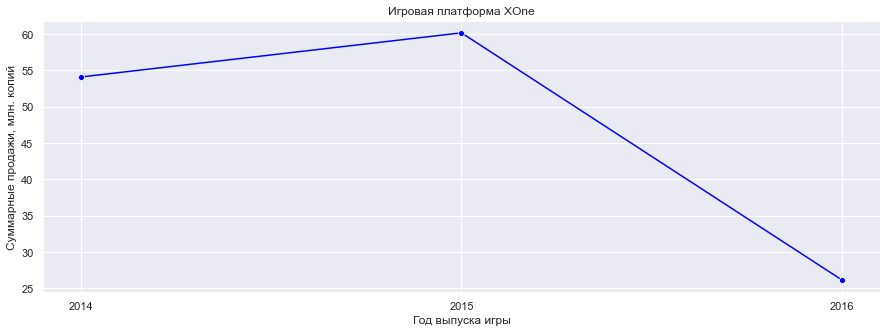

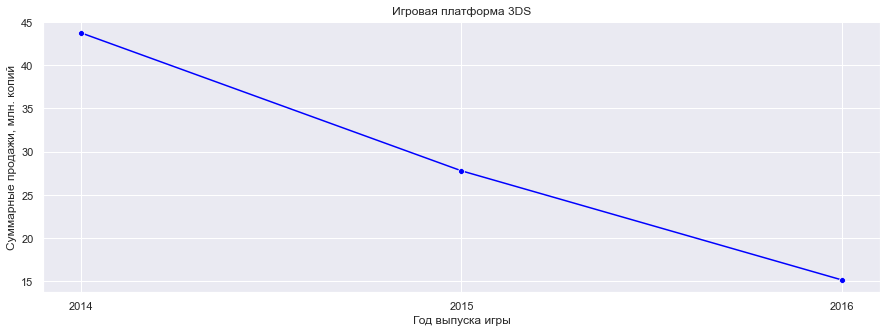

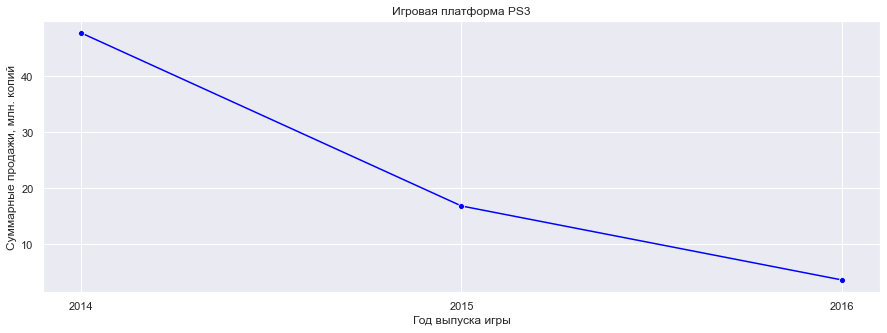

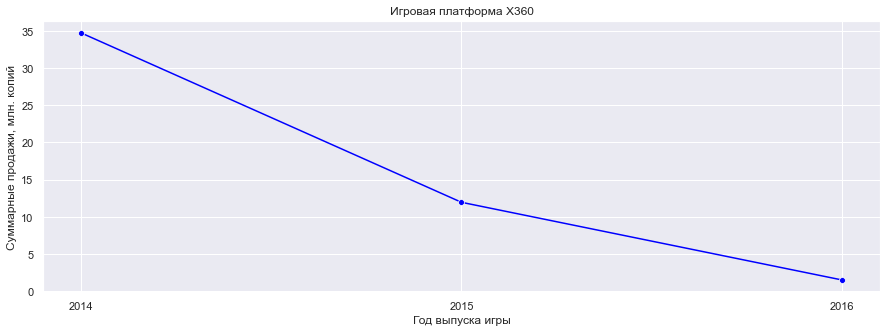

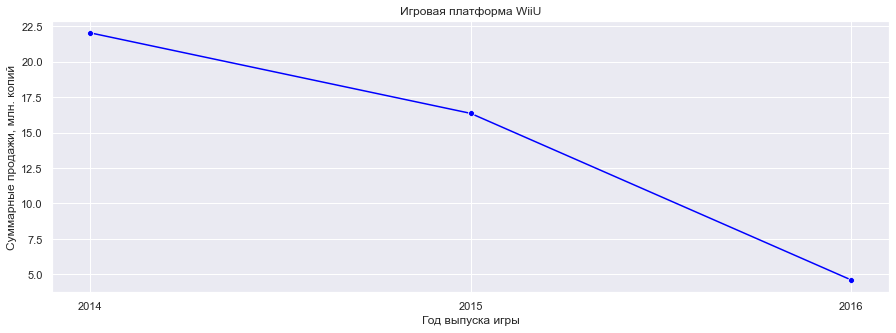

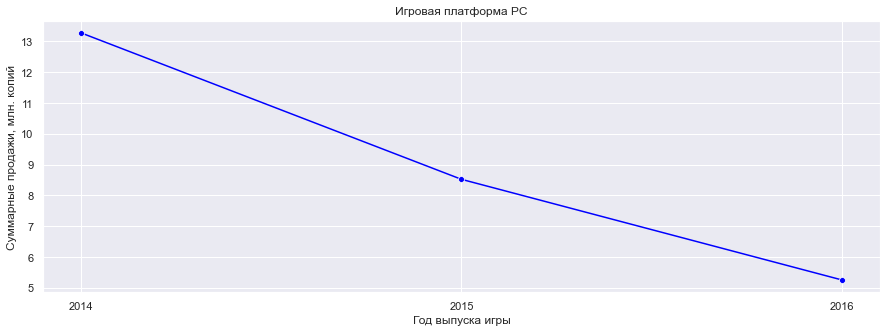

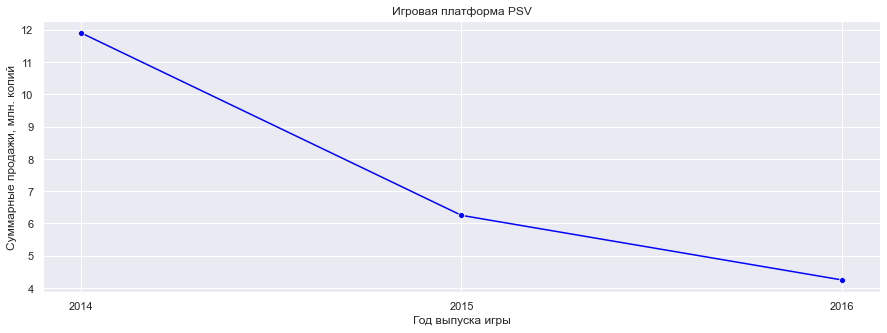

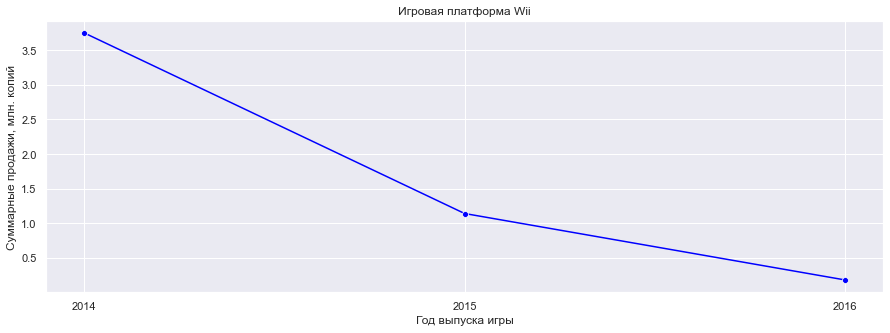

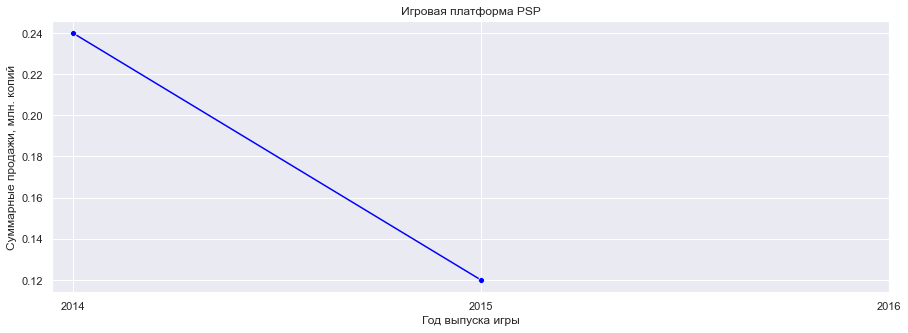

In [57]:
plot_line(df_actual)

Суммарные продажи падают по всем игровым платформам за ислючением:
- PS4;
- XOne.

Однако даже у них наблюдается просадка по продажам в 2016 году, здесь нужно учесть, что данные за 2016 год могут быть не полными. Среди всех эти игровые платформы являются **потенциально прибыльными**.

Запишем названия потенциально прибыльных платформ в список `pot_prof`:

In [58]:
pot_prof = ['PS4', 'XOne']

Приведем суммарные продажи по потенциально прибыльным платформам:

In [59]:
df_actual.query('platform in @pot_prof').pivot_table(
                                                    index='platform', 
                                                    values='sum_sales', 
                                                    aggfunc='sum').sort_values(
                                                                                by='sum_sales', 
                                                                                ascending=False)

,sum_sales
platform,
PS4,288.15
XOne,140.36


Построим диаграмму размаха по суммарным продажам у потенциально прибыльных платформ.

In [60]:
def boxplot(df):
    for platform in pot_prof:
        plt.figure(figsize=(15, 5))
        sns.boxplot(data=df.query('platform == @platform'), y='sum_sales').set_title('Игровая платформа ' + platform)
        plt.ylabel("Суммарные продажи, млн. копий");
        plt.show()

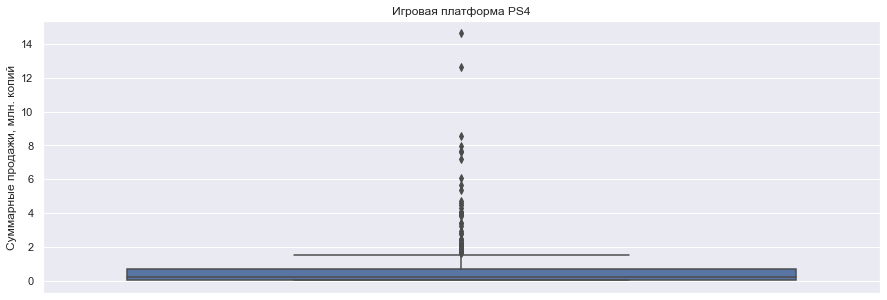

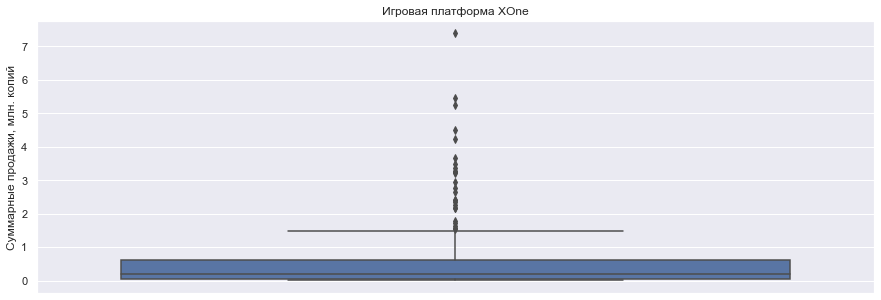

In [61]:
boxplot(df_actual)

Распределение продаж по потенциально прибыльным игровым платформам имеет тяжелый хвост, достаточно много значений выходящие за полтора интерквартильных расстояния. Сам "ящик" у всех диаграмм лежит возле нуля. Это говорит о том, что в основном выпускаются непопулярные игры с низким числом продаж. Интересно рассмотреть "ящик" по подробнее.

Выведем также основные статистические характеристики столбцов для каждой платформы, для этого напишем функцию `df_platform_describe`:

In [62]:
def df_platform_describe(df):
    for platform in pot_prof:
        print('Основные статистические характристики для платформы {}'.format(platform))
        print(df.query('platform == @platform')['sum_sales'].describe())
        print()

In [63]:
df_platform_describe(df_actual)

Основные статистические характристики для платформы PS4
count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: sum_sales, dtype: float64

Основные статистические характристики для платформы XOne
count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: sum_sales, dtype: float64



Посмотрим также на диаграммы размаха без явных выборосов, выбросами будем считать значения, выходящие за полтора интерквартильных размаха. Отфильтруем датасет в новый датафрейм `df_dilt`:

In [64]:
Q1 =  df_actual['sum_sales'].quantile(0.25)
Q3 = df_actual['sum_sales'].quantile(0.75)
IQR = Q3 - Q1
Q3 + 1.5 * IQR

0.8300000000000001

In [65]:
df_filt = df_actual.query('@Q1 - 1.5*@IQR < sum_sales < @Q3 + 1.5*@IQR')

Построим диаграмму размаха по суммарным продажам у потенциально прибыльных платформ без явных выборосов в данных:

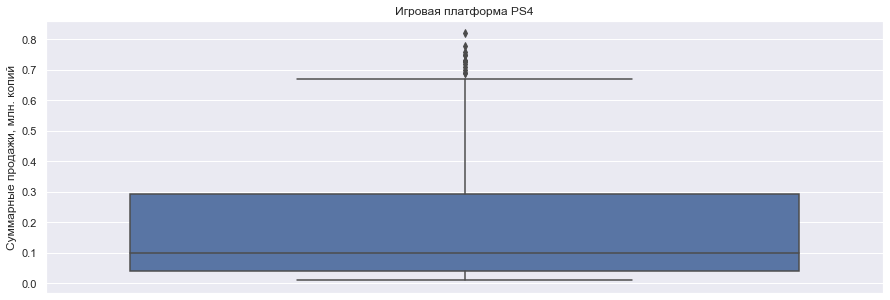

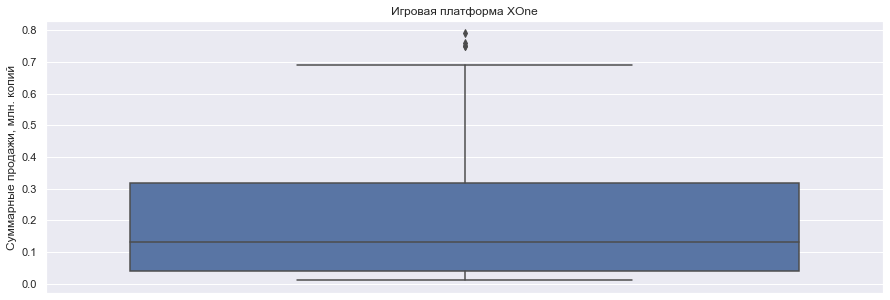

In [66]:
boxplot(df_filt)

In [67]:
df_platform_describe(df_filt)

Основные статистические характристики для платформы PS4
count    296.000000
mean       0.193176
std        0.205114
min        0.010000
25%        0.040000
50%        0.100000
75%        0.292500
max        0.820000
Name: sum_sales, dtype: float64

Основные статистические характристики для платформы XOne
count    182.000000
mean       0.204890
std        0.209914
min        0.010000
25%        0.040000
50%        0.130000
75%        0.317500
max        0.790000
Name: sum_sales, dtype: float64



Распределение продаж по потенциально прибыльным игровым платформам без явных выборосов, лежит в пределах от 0.01 до 0.82 млн. копий для игровой платформы PS4 и в пределах от 0.01 до 0.79 млн. копий для Xone. Среднее число продаж 0.19 и 0.20 млн. копий для PS4 и XOne соотвественно, а медианное число продаж 0.10 и 0.13 млн. копий для PS4 и XOne соотвественно.

### Вывод: Актуальный период данных

- В качестве актуального периода для прогноза кампании на 2017 год выбран период в 5 лет (с 2011 по 2016 год).
- В выбранном актуальном периоде был выявлен топ-10 игровых платформ с наибольшими суммарными продажами:

|Место в топе|Платформа| Суммарные продажи, млн. копий |
|------------|---------|-------------------------------|
|     1      | PS4     | 288
|     2      | XOne    | 140
|     3      | 3DS     | 87
|     4      | PS3     | 68
|     5      | X360    | 48
|     6      | WiiU    | 43
|     7      | PC      | 27
|     8      | PSV     | 22
|     9      | Wii     | 5
|     10     | PSP     | 0

Для каждой игровой платформы из полученного топ-10 были построены графики изменения суммарной прибыли за актуальный период, по ним были определены потенциально прибыльные игровые платформы: 

- PS4;
- XOne;

После чего для каждой из них была построена и проанализирована диаграмма размаха как по всем данным за акутальный период, так и по данным без явных выбросов отфильтрованных в датафрейм `df_filt`. Распределение продаж по потенциально прибыльным игровым платформам имеет тяжелый хвост, достаточно много значений выходящие за полтора интерквартильных расстояния. Сам "ящик" у всех диаграмм лежит возле нуля. Это говорит о том, что в основном выпускаются непопулярные игры с низким числом продаж.

При анализе диаграмм размаха отфильтрованного датасета можно сказать, что распределение суммарных продаж игр лежит в пределах от 0.01 до 0.82 млн. копий для игровой платформы PS4 и в пределах от 0.01 до 0.79 млн. копий для Xone. Среднее число продаж 0.19 и 0.20 млн. копий для PS4 и XOne соответственно, а медианное число продаж 0.10 и 0.13 млн. копий для PS4 и XOne соответственно.


### Влияние отзывов пользователей и критиков на продажи внутри игровой платформы

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Отфильтруем датасет в датафреймы `df_ps4` и `df_xone`:

In [68]:
df_ps4 = df_actual.query('platform == "PS4"')
df_xone = df_actual.query('platform == "XOne"')

Построим матрицу диаграмм рассеяния для игровой платформы PS4:

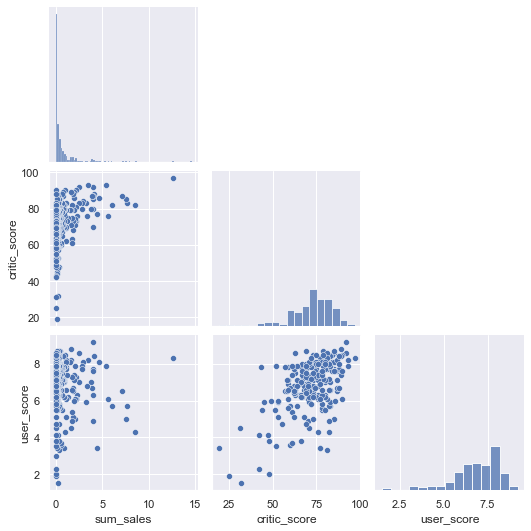

In [69]:
sns.pairplot(df_ps4, 
             x_vars=['sum_sales', 'critic_score', 'user_score'], 
             y_vars=['sum_sales', 'critic_score', 'user_score'], 
             height=2.5, 
             corner=True)
plt.show()

По матрице диаграмм рассеяния наблюдается линейная взаимосвязь между оценкой критиков и суммарными продажами. Однако, достаточно большое количество игр, высоко оценных критиками имеют относительно низкие суммарные продажи. Линейной взаимосвязи между пользовательской оценкой и суммарными продажами не наблюдается.

Построим матрицу диаграмм рассеяния для игровой платформы XOne:

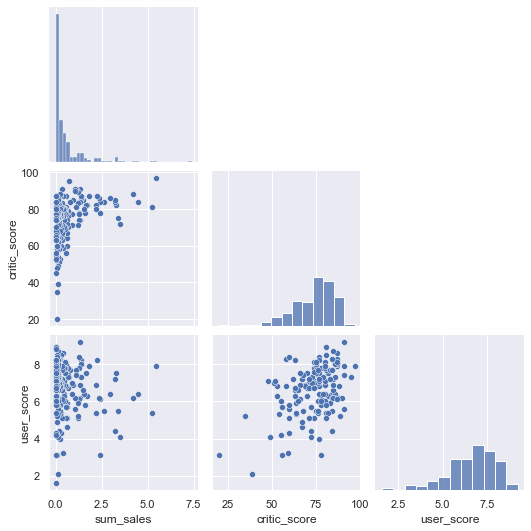

In [70]:
sns.pairplot(df_xone, 
             x_vars=['sum_sales', 'critic_score', 'user_score'], 
             y_vars=['sum_sales', 'critic_score', 'user_score'], 
             height=2.5, 
             corner=True)
plt.show()

Картина по взаимосвязи с отзывами у плафторм схожи. У игровой платформы XOne также наблюдается линейная взаимосвязь оценки критиков и суммарными продажами. Линейной взаимосвязи между пользовательской оценкой и суммарными продажами также не наблюдается.

Посмотрим корреляцию между отзывами и продажами, построим тепловую карту для платформы PS4:

Text(0.5, 1.0, 'Тепловая карта корреляции')

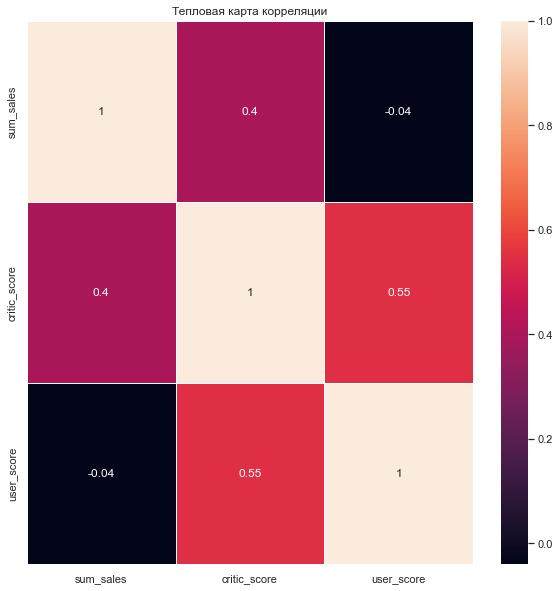

In [71]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    df_ps4[['sum_sales', 'critic_score', 'user_score']].corr(), 
    annot=True, 
    linewidths=.7).set_title('Тепловая карта корреляции')

Коэффициент корреляции Пирсона между оценками критиков и суммарными продажами для платформы PS4 составляет 0.4, а между оценками пользователей и суммарными продажами стремится к нулю. Это подтверждает сделанный вывод по матрице диаграмм рассеяния.

Построим тепловую карту для платформы XOne:

Text(0.5, 1.0, 'Тепловая карта корреляции')

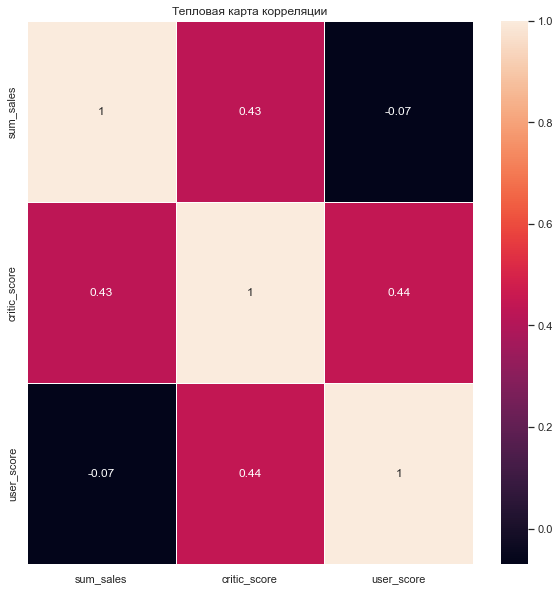

In [72]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    df_xone[['sum_sales', 'critic_score', 'user_score']].corr(), 
    annot=True, 
    linewidths=.7).set_title('Тепловая карта корреляции')

Как уже упоминалось выше, картина по взаимосвязи суммарных продаж с отзывами схожи. Коэффициент корреляции Пирсона между оценками критиков и суммарными продажами для платформы XOne составляет 0.43, а между оценками пользователей и суммарными продажами стремится к нулю. Это подтверждает сделанный вывод по матрице диаграмм рассеяния.

### Выявление самых прибыльных жанров игр

Посмотрим на общее распределение игр по жанрам, данные будем брать из датафрейма `df_actual`.

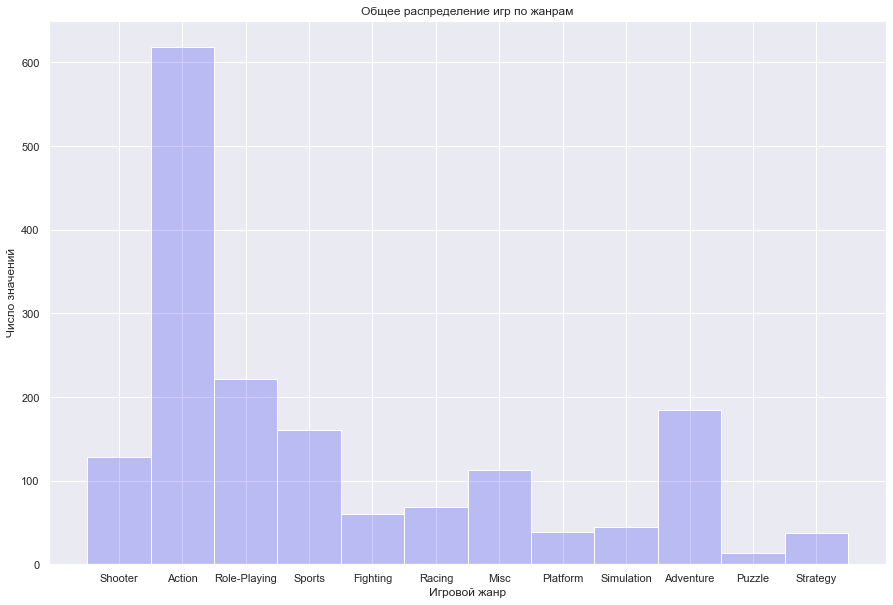

In [73]:
plt.figure(figsize=(15, 10))
sns.histplot(df_actual['genre'],
             color='blue',
             alpha=0.2).set_title('Общее распределение игр по жанрам')
plt.ylabel("Число значений")
plt.xlabel("Игровой жанр");

In [74]:
genres_count = df_actual.pivot_table(index='genre', values='name', aggfunc='count')
genres_count.columns = ['count']
genres_count

,count
genre,
Action,619
Adventure,185
Fighting,60
Misc,113
Platform,38
Puzzle,14
Racing,69
Role-Playing,221
Shooter,128


Возникшний в результате группировки индекс `genre` сделаем столбцом с помощью метода `reset_index`:

In [75]:
genres_count = genres_count.reset_index()

In [76]:
genres_count.sort_values(by='count', ascending=False)

,genre,count
0,Action,619
7,Role-Playing,221
1,Adventure,185
10,Sports,161
8,Shooter,128
3,Misc,113
6,Racing,69
2,Fighting,60
9,Simulation,44
4,Platform,38


За выбранный актуальный период (с 2014 по 2016 год) самый популярный жанр - action (619 игр). Дальше можно выделить пять жанров средней популярности:
- Role_Playing (221 игра);
- Adventure (185 игр);
- Sports (161 игр);
- Shooter (128 игр);
- Misc  (113 игр).

Остальные жанры можно считать жанрами с низкой популярностью (69 игр и менее), самый непопулярный жанр - Puzzle (14 игр).

Построим баровый график, чтобы выяснить какой из жанров самый прибыльный. Для начала соберем суммарные продажи в сводную таблицу по жанрам:

In [77]:
genres_sum_sales = df_actual.pivot_table(index='genre', values='sum_sales', aggfunc='sum')
genres_sum_sales

,sum_sales
genre,
Action,199.36
Adventure,17.55
Fighting,28.22
Misc,37.55
Platform,18.09
Puzzle,2.21
Racing,27.52
Role-Playing,101.44
Shooter,170.94


Возникшний в результате группировки индекс `genre` сделаем столбцом с помощью метода `reset_index`:

In [78]:
genres_sum_sales = genres_sum_sales.reset_index()

In [79]:
genres_sum_sales.sort_values(by='sum_sales', ascending=False)

,genre,sum_sales
0,Action,199.36
8,Shooter,170.94
10,Sports,109.48
7,Role-Playing,101.44
3,Misc,37.55
2,Fighting,28.22
6,Racing,27.52
4,Platform,18.09
1,Adventure,17.55
9,Simulation,13.13


Теперь построим баровый график:

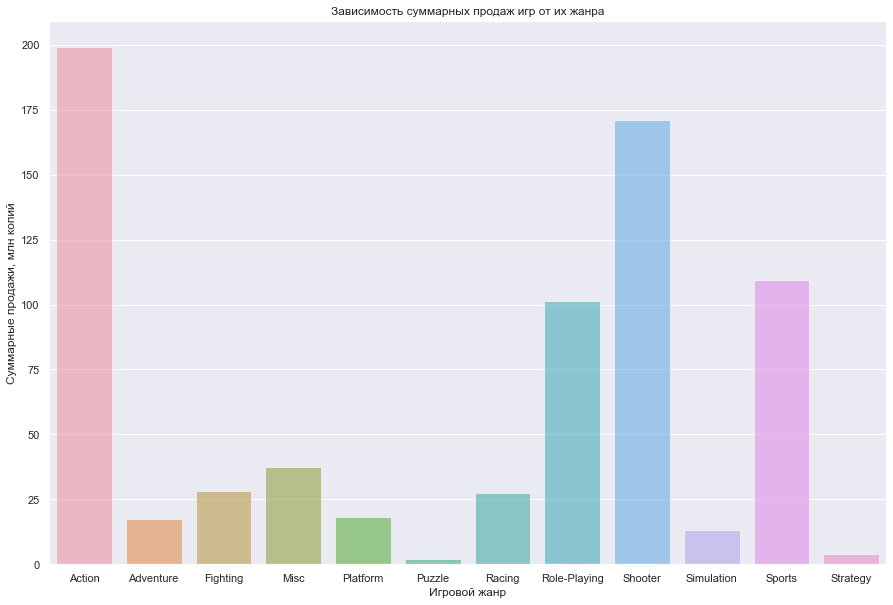

In [80]:
plt.figure(figsize=(15, 10))
plt.title('Зависимость суммарных продаж игр от их жанра')
sns.barplot(data=genres_sum_sales, y='sum_sales', x='genre', alpha=0.6)
plt.ylabel("Суммарные продажи, млн копий")
plt.xlabel("Игровой жанр");

Самый продаваемый жанр - Action (199 млн. продаж), это выглядит логично так как в этом жанре игр выпускается больше всего. В среднюю группу по продажам можно выделить 3 жанра:
- Shooter (171 млн. продаж);
- Sports (109 млн. продаж);
- Role-Playing (101 млн. продаж).

Остальные жанры входят в категорию низкопродаваемых (менее 37 млн. продаж). Жанр с самым низким числом продаж - Puzzle (18 млн. продаж).

Однако, так как число игр в каждом жанре различное, баровый график по суммарным продажам неинформативен. Интереснее будет посмотреть распределение доли продаж для каждого жанра.

Объеденим таблицы по числу игр в каждом жанре и их суммарные продажи:

In [81]:
ratio_sum_sales = genres_sum_sales.join(genres_count, how='left', rsuffix='_right')
ratio_sum_sales

,genre,sum_sales,genre_right,count
0,Action,199.36,Action,619
1,Adventure,17.55,Adventure,185
2,Fighting,28.22,Fighting,60
3,Misc,37.55,Misc,113
4,Platform,18.09,Platform,38
5,Puzzle,2.21,Puzzle,14
6,Racing,27.52,Racing,69
7,Role-Playing,101.44,Role-Playing,221
8,Shooter,170.94,Shooter,128
9,Simulation,13.13,Simulation,44


In [82]:
ratio_sum_sales = ratio_sum_sales.drop(['genre_right'], axis=1)

Расчитаем долю продаж для одной игры в каждом жанре:

In [83]:
ratio_sum_sales['ratio_sum_sales'] = ratio_sum_sales['sum_sales'] / ratio_sum_sales['count']

In [84]:
ratio_sum_sales.sort_values(by='ratio_sum_sales', ascending=False)

,genre,sum_sales,count,ratio_sum_sales
8,Shooter,170.94,128,1.335469
10,Sports,109.48,161,0.680000
4,Platform,18.09,38,0.476053
2,Fighting,28.22,60,0.470333
7,Role-Playing,101.44,221,0.459005
6,Racing,27.52,69,0.398841
3,Misc,37.55,113,0.332301
0,Action,199.36,619,0.322068
9,Simulation,13.13,44,0.298409
5,Puzzle,2.21,14,0.157857


Теперь построим баровый график средней суммарной продажи 1 игры в каждом жанре:

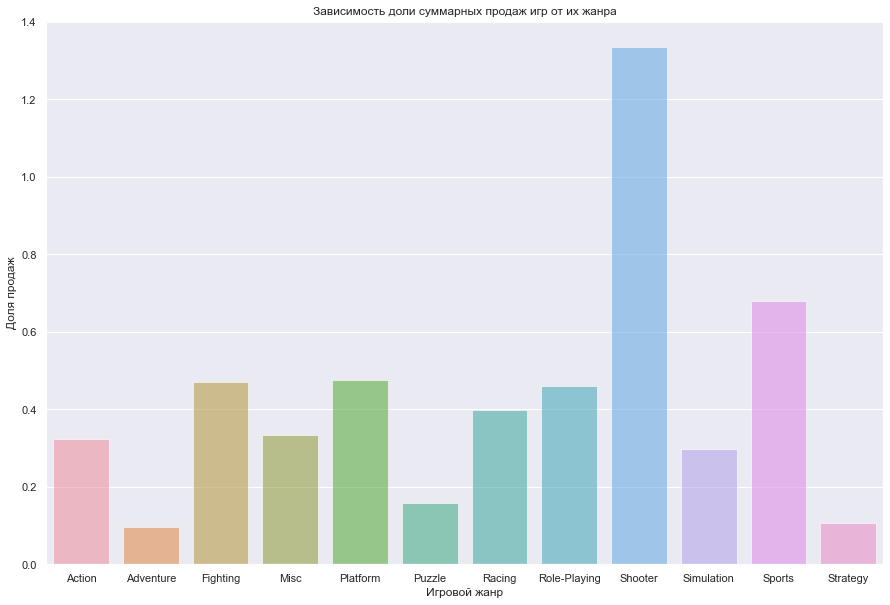

In [85]:
plt.figure(figsize=(15, 10))
plt.title('Зависимость доли суммарных продаж игр от их жанра')
sns.barplot(data=ratio_sum_sales, y='ratio_sum_sales', x='genre', alpha=0.6);
plt.ylabel("Доля продаж")
plt.xlabel("Игровой жанр");

После проведния такой нормировки, картина изменилась. Самым **потенциально продаваемым** жанром является **Shooter** (доля продаж 1.33), за ним идет **Sports** (доля продаж 0.68) и **Platform** (доля продаж 0.47). Самую низкую долю продаж имеет жанр Adventure, она составляет - 0.09.

### Вывод: Выявление самых прибыльных жанров игр

Больше всего выпускается игр в жанре Action и суммарные продажи по нему самые большие. Приведем результаты по оценке самых популярных жанров у разработчиков игр:

За выбранный актуальный период (с 2014 по 2016 год) самый популярный жанр - action (619 игр). Дальше можно выделить пять жанров средней популярности:
- Role_Playing (221 игра);
- Adventure (185 игр);
- Sports (161 игр);
- Shooter (128 игр);
- Misc  (113 игр).

Остальные жанры можно считать жанрами с низкой популярностью (69 игр и менее), самый непопулярный жанр - Puzzle (14 игр).

Результаты по выявлению жанров с самыми высокими суммарными продажами:

Самый продаваемый жанр - Action (199 млн. продаж), это выглядит логично так как в этом жанре игр выпускается больше всего. В среднюю группу по продажам можно выделить 3 жанра:
- Shooter (171 млн. продаж);
- Sports (109 млн. продаж);
- Role-Playing (101 млн. продаж).

Остальные жанры входят в категорию низко продаваемых (менее 37 млн. продаж). Жанр с самым низким числом продаж - Puzzle (18 млн. продаж).

Однако, такой анализ не является информативным. Так как количество игр отличается, суммарные продажи неверно иллюстрируют картину на рынке.

Интереснее посмотреть долю суммарных продаж по жанрам. После вычисления такой доли, можно назвать **самые потенциально прибыльные** жанры за выбранный актуальный период:

- Shooter (доля продаж 1.33);
- Sports (доля продаж 0.68);
- Platform (доля продаж 0.47).


## Портрет пользователя каждого региона

Определим портрет пользователя для каждого из регионов.

Сначала выделим топ-5 самых популярных игровых платформ и жанров для каждого из регионов. 

Для более истинного портрета пользователей будем брать не суммарные продажи по региону, а доли продаж (как в заключении предидущего раздела). Для этого построим сводную таблицу и расчитаем долю продаж для каждого региона.

Построим сводную таблицу с суммарными продажами для каждого региона:

In [86]:
df_sums = df_actual.pivot_table(
    index=['platform', 'genre'], 
    values=['na_sales', 'eu_sales', 'jp_sales'], 
    aggfunc='sum')

Избавимся от мультииндекса и переименуем столбцы:

In [87]:
df_sums = df_sums.reset_index(level=1).reset_index()
df_sums.columns =['platform', 'genre', 'na_sales_sum', 'eu_sales_sum', 'jp_sales_sum']

Выведем первые 5 строк датафрейма:

In [88]:
df_sums.head()

,platform,genre,na_sales_sum,eu_sales_sum,jp_sales_sum
0,3DS,Action,3.73,13.25,4.37
1,3DS,Adventure,0.27,0.92,0.31
2,3DS,Fighting,1.40,2.81,3.39
3,3DS,Misc,1.06,2.05,0.61
4,3DS,Platform,1.02,1.23,1.49


Число игр в каждом регионе одинаковое. Построим сводную таблицу с подсчетом числа игр:

In [89]:
df_counts = df_actual.pivot_table(
    index=['platform', 'genre'], 
    values=['na_sales'], 
    aggfunc='count')

Избавимся от мультииндекса и переименуем столбцы:

In [90]:
df_counts = df_counts.reset_index(level=1).reset_index()
df_counts.columns =['platform', 'genre', 'count']

Выведем первые 5 строк датафрейма:

In [91]:
df_counts.head()

,platform,genre,count
0,3DS,Action,87
1,3DS,Adventure,21
2,3DS,Fighting,5
3,3DS,Misc,20
4,3DS,Platform,8


Объеденим датафреймы:

In [92]:
df_regions = df_counts.merge(df_sums)

Выведем первые 5 строк датафрейма:

In [93]:
df_regions.head()

,platform,genre,count,na_sales_sum,eu_sales_sum,jp_sales_sum
0,3DS,Action,87,3.73,13.25,4.37
1,3DS,Adventure,21,0.27,0.92,0.31
2,3DS,Fighting,5,1.40,2.81,3.39
3,3DS,Misc,20,1.06,2.05,0.61
4,3DS,Platform,8,1.02,1.23,1.49


Создадим столбецы `na_ratio_sales`, `eu_ratio_sales`, `jp_ratio_sales` с долей продаж по конкретному региону:

In [94]:
df_regions['na_sales_ratio'] = df_regions['na_sales_sum'] / df_regions['count']
df_regions['eu_sales_ratio'] = df_regions['eu_sales_sum'] / df_regions['count']
df_regions['jp_sales_ratio'] = df_regions['jp_sales_sum'] / df_regions['count']

Выведем первые 5 строк датафрейма:

In [95]:
df_regions.head()

,platform,genre,count,na_sales_sum,eu_sales_sum,jp_sales_sum,na_sales_ratio,eu_sales_ratio,jp_sales_ratio
0,3DS,Action,87,3.73,13.25,4.37,0.042874,0.152299,0.050230
1,3DS,Adventure,21,0.27,0.92,0.31,0.012857,0.043810,0.014762
2,3DS,Fighting,5,1.40,2.81,3.39,0.280000,0.562000,0.678000
3,3DS,Misc,20,1.06,2.05,0.61,0.053000,0.102500,0.030500
4,3DS,Platform,8,1.02,1.23,1.49,0.127500,0.153750,0.186250


Построим баровые графики зависимости доли продаж в конкретном регионе от игровой платформы и жанра. Напишем функцию для построения:

In [96]:
def plot_bar(df, how, region):
    if region == 'na_sales_ratio':
        region_name = 'Северная Америка'
    if region == 'eu_sales_ratio':
        region_name = 'Европа'
    if region == 'jp_sales_ratio':
        region_name = 'Япония'
    if how == 'platform':
        how_name = 'Игровая платформа'
    if how == 'genre':
        how_name = 'Игровой жанр'
    plt.figure(figsize=(15, 5))
    sns.barplot(
                data=df.pivot_table(
                        index=how, 
                        values=region, 
                        aggfunc='sum').reset_index(),
                    y=region,
                    x=how,
                    ci=None,
                    alpha=0.6).set_title('Суммарная доля продаж по региону {}'.format(region_name))
    plt.ylabel("Доля продаж")
    plt.xlabel(how_name);
    plt.show()
                    

Теперь построим графики для каждого региона:

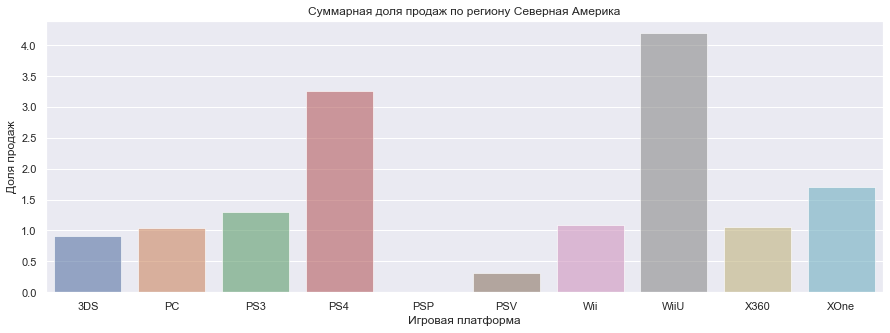

In [97]:
plot_bar(df_regions, 'platform', 'na_sales_ratio')

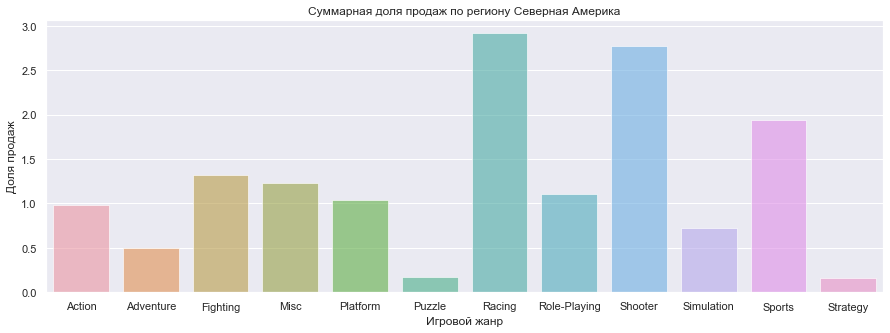

In [98]:
plot_bar(df_regions, 'genre', 'na_sales_ratio')

Топ-5 самых популярных игровых платформ и жанров для региона **Северной Америки** представленны в таблице:

| Место в топе | Платформа | Жанр         |
| ------------ | --------- | ------------ |
| 1            | WiiU      | Racing       |
| 2            | PS4       | Shooter      |
| 3            | XOne      | Sports       |
| 4            | PS3       | Fighting     |
| 5            | Wii       | Misc         |

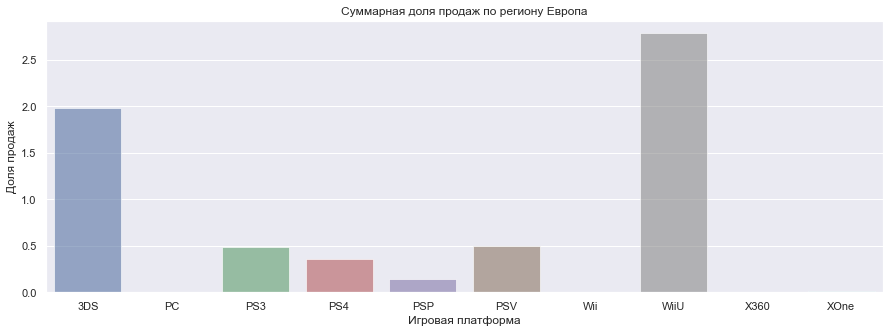

In [99]:
plot_bar(df_regions, 'platform', 'eu_sales_ratio')

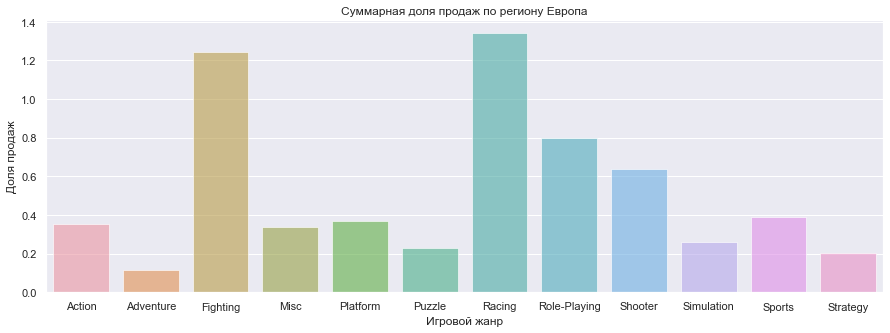

In [100]:
plot_bar(df_regions, 'genre', 'eu_sales_ratio')

Топ-5 самых популярных игровых платформ и жанров для региона **Европа** представленны в таблице:

| Место в топе | Платформа | Жанр         |
| ------------ | --------- | ------------ |
| 1            | WiiU      | Racing       |
| 2            | 3DS       | Fighting     |
| 3            | PSV       | Role-Playing |
| 4            | PS3       | Shooter      |
| 5            | PS4       | Sports       |



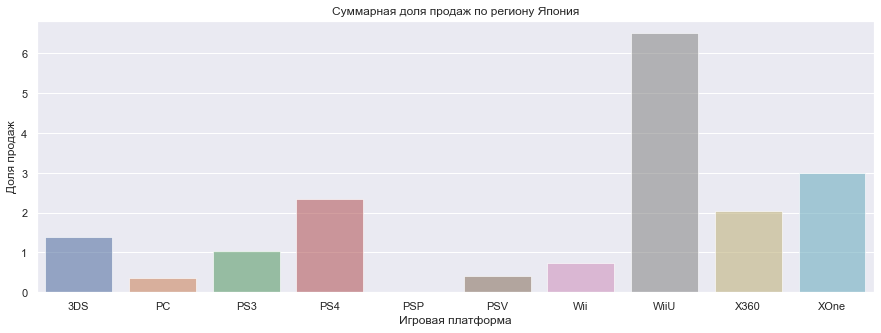

In [101]:
plot_bar(df_regions, 'platform', 'jp_sales_ratio')

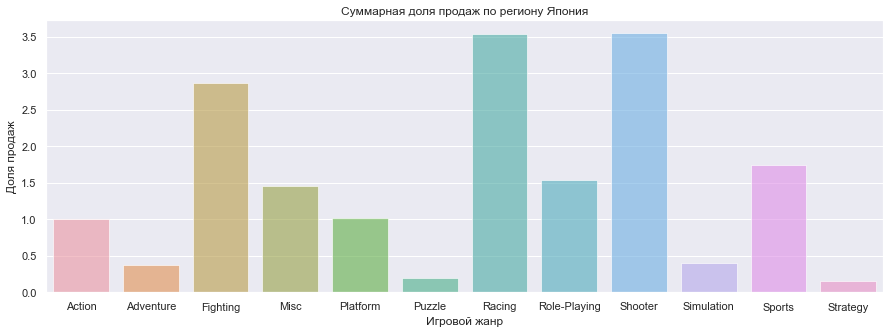

In [102]:
plot_bar(df_regions, 'genre', 'jp_sales_ratio')

Топ-5 самых популярных игровых платформ и жанров для региона **Япония** представленны в таблице:

| Место в топе | Платформа | Жанр         |
| ------------ | --------- | ------------ |
| 1            | WiiU      | Shooters     |
| 2            | XOne      | Racing       |
| 3            | PS4       | Fighting     |
| 4            | X360      | Sports       |
| 5            | 3DS       | Misc         |

Изучим влияние рейтинга ESRB на продажи в каждом отдельном регионе.

Построим матрицу диаграмм рассеяния для суммарных продаж по каждому региону:

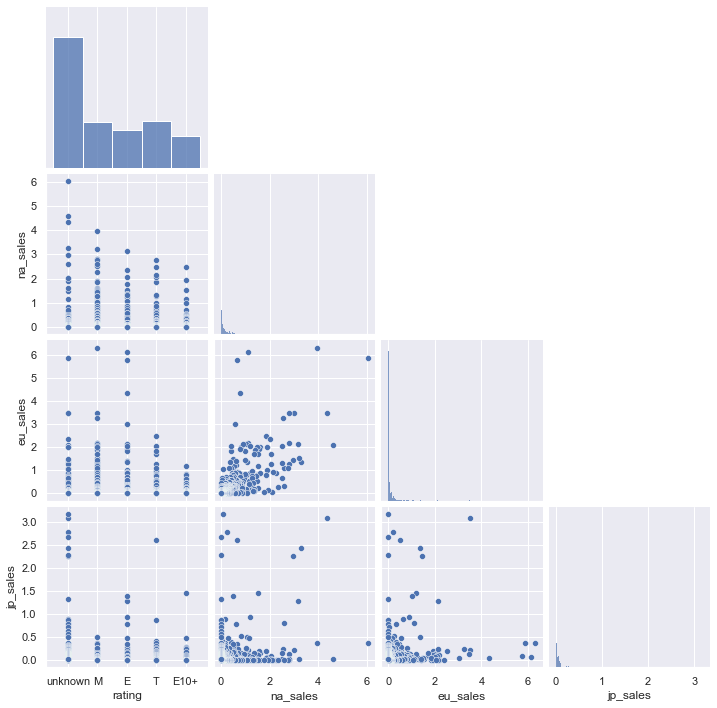

In [103]:
sns.pairplot(df_actual, 
             x_vars=['rating', 'na_sales', 'eu_sales', 'jp_sales'], 
             y_vars=['rating', 'na_sales', 'eu_sales', 'jp_sales'], 
             height=2.5, 
             corner=True)
plt.show()

Самые высокие продажи у нашего индикатора "unknown", особенно у региона Япония. По региону Япония четко прослеживается, что часть индикатора "unknown" принадлежит к одной группе, а часть к другой. 

В целом, можно сказать что среди пропущенных значений рейтинга есть те, которые имеют наибольшие суммарные продажи.

По рейтингу ESRB (возьмем только наиболее встречаемые):
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
- «E» («Everyone») — «Для всех»: Содержание подходит для возрастной категории от 6 лет. 
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Содержание подходит для возрастной категории от 10 лет.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 

В регионе Северной Америки больше всего продаж жанра рейтинга «M» и «E10+», в регионе Европа «M» и «E». В регионе Япония картина иная, больше всего продаж рейтинга «E» и «T». Возможно это связано с культурными особенностями регионов.

### Вывод: Составление портрета пользователя каждого региона

В целом, портреты пользователя для каждого региона совершенно различные. Топ-5 платформ и жанров игр представлены в соответствующих таблицах:

- **Северная Америка**

| Место в топе | Платформа | Жанр         |
| ------------ | --------- | ------------ |
| 1            | WiiU      | Racing       |
| 2            | PS4       | Shooter      |
| 3            | XOne      | Sports       |
| 4            | PS3       | Fighting     |
| 5            | Wii       | Misc         |

- **Европа**

| Место в топе | Платформа | Жанр         |
| ------------ | --------- | ------------ |
| 1            | WiiU      | Racing       |
| 2            | 3DS       | Fighting     |
| 3            | PSV       | Role-Playing |
| 4            | PS3       | Shooter      |
| 5            | PS4       | Sports       |

- **Япония**

| Место в топе | Платформа | Жанр         |
| ------------ | --------- | ------------ |
| 1            | WiiU      | Shooters     |
| 2            | XOne      | Racing       |
| 3            | PS4       | Fighting     |
| 4            | X360      | Sports       |
| 5            | 3DS       | Misc         |

Как не странно, в Северной Америке большую популярность имеют японские playstation, а в Японии американские xbox. По списку самых популярных жанров регионы также согласуются. В регионе Европа наибольшую популярность имеют портативные платформы с самыми популярными жанрами присущими для портативных платформ.

Касаемо рейтинга ESBR:

В регионе Северной Америки больше всего продаж жанра рейтинга «M» и «E10+», в регионе Европа «M» и «E». В регионе Япония картина иная, больше всего продаж рейтинга «E» и «T». Возможно, это связано с культурными особенностями регионов.

Самые высокие продажи у нашего индикатора "unknown", особенно у региона Япония. По региону Япония четко прослеживается, что часть индикатора "unknown" принадлежит к одной группе, а часть к другой. 

В целом, можно сказать, что среди пропущенных значений рейтинга есть те, которые имеют наибольшие суммарные продажи.


<AxesSubplot:>

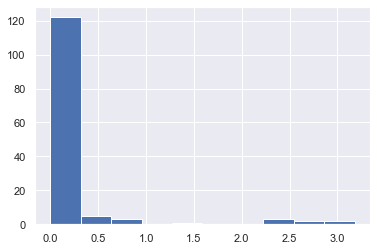

In [104]:
df_actual.query('rating == "unknown" and platform == "3DS"')['jp_sales'].hist()

In [105]:
jp_genres = df_actual.pivot_table(index = 'rating', columns = 'platform', 
                  values = 'jp_sales', aggfunc = 'median')
display(jp_genres)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
rating,,,,,,,,,,
E,0.01,0.0,0.00,0.00,NaN,0.00,0.0,0.085,0.0,0.0
E10+,0.01,0.0,0.00,0.00,NaN,0.00,0.0,0.000,0.0,0.0
M,0.08,0.0,0.02,0.03,NaN,0.04,NaN,0.040,0.0,0.0
T,0.08,0.0,0.04,0.02,NaN,0.06,NaN,0.010,0.0,0.0
unknown,0.06,0.0,0.03,0.02,0.02,0.03,0.0,0.020,0.0,0.0


## Проверка гипотез

Для выполнения поставленной задачи также необходимо проверить две гипотезы:
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2) Средние пользовательские рейтинги жанров Action и Sports разные.

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую гипотезу $H_{0}$ : средние пользовательские рейтинги платформ Xbox One и PC равны. Тогда альтернативная гипотеза $H_{1}$ : средние пользовательские рейтинги платформ Xbox One и PC различны.

Выведем первые 5 строк датафрейма `df_actual`:

In [106]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


Отфильтруем датасет по платформам Xbox One и PC в соотвествующие датафреймы - `df_xone` `df_pc`:

In [107]:
df_xone = df_actual.query('platform == "XOne"')
df_pc = df_actual.query('platform == "PC"')

Отфильтруем новые датафреймы от `NaN`:

In [108]:
df_xone = df_xone[~df_xone['user_score'].isna()]

In [109]:
df_pc = df_pc[~df_pc['user_score'].isna()]

Установим уровень значимости в 5 %:

In [110]:
alpha = 0.05

Проведем двусторонний t-тест для независимых выборок:

In [111]:
results = st.ttest_ind(df_xone['user_score'], df_pc['user_score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Данные не противоречат нулевой гипотезе, поэтому мы не можем ее отвергнуть. p-значение составляет $0.10$, поэтому мы имем статистически значимый результат. 

### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую гипотезу $H_{0}$ : средние пользовательские рейтинги жанров Action и Sports равны. Тогда альтернативная гипотеза $H_{1}$ : средние пользовательские рейтинги жанров Action и Sports различны.

Выведем первые 5 строк датафрейма `df_actual`:

In [112]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


Отфильтруем датасет по жанрам Action и Sports в соотвествующие датафреймы - `df_action` `df_sports`:

In [113]:
df_action = df_actual.query('genre == "Action"')
df_sports = df_actual.query('genre == "Sports"')

Отфильтруем новые датафреймы от `NaN`:

In [114]:
df_action = df_action[~df_action['user_score'].isna()]

In [115]:
df_sports = df_sports[~df_sports['user_score'].isna()]

Установим уровень значимости в 5%:

In [116]:
alpha = 0.05

Проведем двусторонний t-тест для независимых выборок:

In [117]:
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


Данные противоречат нулевой гипотезе, поэтому мы ее отвергаем. p-значение составляет $2.87\cdot10^{-19}$, поэтому мы имем статистически значимый результат. Альтернативная гипотеза $H_{1}$ : средние пользовательские рейтинги жанров Action и Sports различны - принимается.

### Вывод: Проверка гипотез

С помощью двустороннего t-теста для независимых выборок были проверены две гипотезы:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2) Средние пользовательские рейтинги жанров Action и Sports разные.

В результате проверок, данные этим гипотезам не противоречат, более того, результаты статистически значимы.

В ходе проверки был установлен уровень статистической значимости - 5 %. И сформулированы нулевые и альтернативные гипотезы для каждой из поставленной задачей гипотез:

1) Для первой гипотезы:
- $H_{0}$ : средние пользовательские рейтинги платформ Xbox One и PC равны. 
- $H_{1}$ : средние пользовательские рейтинги платформ Xbox One и PC различны.
 p-значение для нулевой гипотезы составляет $0.10$, нулевую гипотезу не удалось отвергнуть. 
 
2) Для второй гипотезы:
- $H_{0}$ : средние пользовательские рейтинги жанров Action и Sports равны.
- $H_{1}$ : средние пользовательские рейтинги жанров Action и Sports различны.
 p-значение для нулевой гипотезы составляет $2.87\cdot10^{-19}$, данные противоречат нулевой гипотезе.




## Общий вывод

В ходе работы данные были предобработаны и проведен их исследовательский анализ.

- При предобработке было обнаружено:

1) Очень много явных и неявных пропусков. Причиной появления последних, возможно является низкая популярность конкретных игр и соответственно низкие ее продажи. Значения в столбцах имеют порядок миллиона копий, вполне может быть, что в данных много непопулярных игр, которые имели продажи порядка десяти тысяч копий и были записаны как нули. Также имеет место системный сбой (при сборе или обработке данных), так как шаблон пропусков (при визуализации их с помощью матрицы пропусков) очень схож. Касаемо явных пропусков в данных, шаблон их распределения в датасете очень схож. Наличие их в датасете носит систематический характер, что может говорить о том что данные неполные. Возможно, информация в датасет просто не была добавлена.

Пройдемся по конкретным пропускам:

1) явные пропуски в столбцах `name`, `genre` и `year_of_release` были отброшены, так как их доля в датафрейме достаточно низка (по 0.012 и 1.6 % соответственно);

2) явные пропуски в столбцах `critic_score`, `user_score` были игнорированы, так как их доля довольно высока (51.3, 40.1 и 40.0 % соответственно) и заполнение медианными значениями влечет за собой неестественное искажение распределений значений в этих столбцах и, соответственно, неверным выводам.

3) явные пропуски в категориальном столбец `rating` были заполнены значениями-заглушками - "unknown". 

4) неявные пропуски в столбцах типа `_score` (значения продаж равные нулю) были игнорированы, так как это ценная информация, их заполнение приводит к искажению данных. 

- В датафрейм был добавлен столбец `sum_sales` с суммарными продажами по всех регионах

- При проведении исследовательского анализа данных было выяснено:

1) Больше всего игр было выпущено в 2008 и 2009 году, после чего наблюдается спад (число выпускаемых игр в год падает практическим в 2 раза в 2012 году). В 2016 году число выпускаемых игр снова возвращается на уровень до падения в 2012 году. Резкие перепады числа выпускаемых игр возможно связаны с выходом тех или иных игровых платформ.

2) Интересно, что срок актуальности игровой платформы составляет от 7 до 11 лет (в среднем 10 лет). Из этого ряда выбиваются некоторые платформы:
- 31 год для PC. PC ее можно назвать "нестареющей" игровой платформой, вопросов не возникает.
- 3 года для PS4. Ничего удивительного, платформа playstation 4 является самой "свежей" в нашем топ-10, ее дата выхода - 2013 год.

3) В качестве актуального периода для прогноза кампании на 2017 год выбран период в 3 года (с 2014 по 2016 год). Исходя из построенных распределений, резкий спад платформы может произойти буквально за 3 года. Лидер по продажам за всю историю PS2. Но продажи к 2011 году уже нулевые. X360 был на пике в 2010, но к 2016 упал почти до 0. Мы видим, что с 2008 по 2012 наблюдалось резкое снижение продаж и релизов, поэтому некоторые платформы уже нежизнеспособны в 2013 и в 2017 соответственно.

- В выбранном актуальном периоде был выявлен топ-10 игровых платформ с наибольшими суммарными продажами:

|Место в топе|Платформа| Суммарные продажи, млн. копий |
|------------|---------|-------------------------------|
|     1      | PS4     | 288
|     2      | XOne    | 140
|     3      | 3DS     | 87
|     4      | PS3     | 68
|     5      | X360    | 48
|     6      | WiiU    | 43
|     7      | PC      | 27
|     8      | PSV     | 22
|     9      | Wii     | 5
|     10     | PSP     | 0

- Для каждой игровой платформы из полученного топ-10 были построены графики изменения суммарной прибыли за актуальный период, по ним были определены **потенциально прибыльные** игровые платформы: 

**- PS4;**
**- XOne.**

После чего для каждой из них была построена и проанализирована диаграмма размаха как по всем данным за акутальный период, так и по данным без явных выбросов отфильтрованных в датафрейм `df_filt`. Распределение продаж по потенциально прибыльным игровым платформам имеет тяжелый хвост, достаточно много значений выходящие за полтора интерквартильных расстояния. Сам "ящик" у всех диаграмм лежит возле нуля. Это говорит о том, что в основном выпускаются непопулярные игры с низким числом продаж.

При анализе диаграмм размаха отфильтрованного датасета можно сказать, что распределение суммарных продаж игр лежит в пределах от 0.01 до 0.82 млн. копий для игровой платформы PS4 и в пределах от 0.01 до 0.79 млн. копий для Xone. Среднее число продаж 0.19 и 0.20 млн. копий для PS4 и XOne соответственно, а медианное число продаж 0.10 и 0.13 млн. копий для PS4 и XOne соответственно.

4) Суммарные продажи игры положительно коррелируют с оценкой критиков, коэффициент корреляции Пирсона равен 0.4. Корреляции между продажами игр и оценки пользователей не обнаружено, коэффициент корреляции Пирсона стремится к нулю.

5) Больше всего выпускается игр в жанре Action и суммарные продажи по нему самые большие. Приведем результаты по оценке самых популярных жанров у разработчиков игр:

За выбранный актуальный период (с 2014 по 2016 год) самый популярный жанр - action (619 игр). Дальше можно выделить пять жанров средней популярности:
- Role_Playing (221 игра);
- Adventure (185 игр);
- Sports (161 игр);
- Shooter (128 игр);
- Misc  (113 игр).

- Результаты по выявлению жанров с самыми высокими суммарными продажами:

Самый продаваемый жанр - Action (199 млн. продаж), это выглядит логично так как в этом жанре игр выпускается больше всего. В среднюю группу по продажам можно выделить 3 жанра:
- Shooter (171 млн. продаж);
- Sports (109 млн. продаж);
- Role-Playing (101 млн. продаж).

**Однако, такой анализ не является информативным. Так как количество игр отличается, суммарные продажи неверно иллюстрируют картину на рынке.**

Интереснее было посмотреть долю суммарных продаж по жанрам. После вычисления такой доли, можно назвать самые потенциально прибыльные жанры за выбранный актуальный период:

- **Shooter (доля продаж 1.33);**
- **Sports (доля продаж 0.68);**
- **Platform (доля продаж 0.47).**

6) Портрет пользователя каждого региона.

В целом, портреты пользователя для каждого региона совершенно различные. Топ-5 платформ и жанров игр представлены в соответствующих таблицах:

- **Северная Америка**

| Место в топе | Платформа | Жанр         |
| ------------ | --------- | ------------ |
| 1            | WiiU      | Racing       |
| 2            | PS4       | Shooter      |
| 3            | XOne      | Sports       |
| 4            | PS3       | Fighting     |
| 5            | Wii       | Misc         |

- **Европа**

| Место в топе | Платформа | Жанр         |
| ------------ | --------- | ------------ |
| 1            | WiiU      | Racing       |
| 2            | 3DS       | Fighting     |
| 3            | PSV       | Role-Playing |
| 4            | PS3       | Shooter      |
| 5            | PS4       | Sports       |

- **Япония**

| Место в топе | Платформа | Жанр         |
| ------------ | --------- | ------------ |
| 1            | WiiU      | Shooters     |
| 2            | XOne      | Racing       |
| 3            | PS4       | Fighting     |
| 4            | X360      | Sports       |
| 5            | 3DS       | Misc         |


**!**Как не странно, в Северной Америке большую популярность имеют японские playstation, а в Японии американские xbox. По списку самых популярных жанров регионы также согласуются. В регионе Европа наибольшую популярность имеют портативные платформы с самыми популярными жанрами присущими для портативных платформ.

7) Касаемо рейтинга ESBR:

В регионе Северной Америки больше всего продаж жанра рейтинга «M» и «E10+», в регионе Европа «M» и «E». В регионе Япония картина иная, больше всего продаж рейтинга «E» и «T». Возможно это связано с культурными особенностями регионов.

Самые высокие продажи у нашего индикатора "unknown", особенно у региона Япония. По региону Япония четко прослеживается, что часть индикатора "unknown" принадлежит к одной группе, а часть к другой. 

В целом, можно сказать что среди пропущенных значений рейтинга помеченных маркером "unknown" есть те, которые имеют наибольшие суммарные продажи.

8) В ходе исследовательского анализа данных с помощью двустороннего t-теста для независимых выборок были проверены две гипотезы:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2) Средние пользовательские рейтинги жанров Action и Sports разные.

В результате проверок, данные этим гипотезам не противоречат, более того, результаты статистически значимы.

В ходе проверки был установлен уровень статистической значимости - 5 %. И сформулированы нулевые и альтернативные гипотезы для каждой из поставленной задачей гипотез:

1) Для первой гипотезы:
- $H_{0}$ : средние пользовательские рейтинги платформ Xbox One и PC равны. 
- $H_{1}$ : средние пользовательские рейтинги платформ Xbox One и PC различны.
 p-значение для нулевой гипотезы составляет $0.10$, нулевую гипотезу не удалось отвергнуть. 
 
2) Для второй гипотезы:
- $H_{0}$ : средние пользовательские рейтинги жанров Action и Sports равны.
- $H_{1}$ : средние пользовательские рейтинги жанров Action и Sports различны.
 p-значение для нулевой гипотезы составляет $2.87\cdot10^{-19}$, данные противоречат нулевой гипотезе.

 
**Рекомендации по кампании на 2017 год:**

В выборе игровых платформ необходимо сделать ставку на потенциально прибыльные платформы, выявленные в ходе исследовательского анализа, а именно - **PS4**, **XOne**, **PSV** и потенциально прибыльные жанры: **Shooter**, **Platform**, **Sports**. 

Причем в зависимости от региона продажи, можно опираться на составленный портрет пользователя для каждого из регионов представленный выше. 

